# E-Commerce & Retail B2B Case Study

## Business Understanding

• Schuster is a multinational retail company dealing in sports goods and accessories. Schuster conducts significant business with hundreds of its vendors, with whom it has credit arrangements. 

• In a B2C business, when a company sells its goods or services directly to its end users and charges for them, the transactions occur instantly, and in most cases, the transactions’ value is collected immediately. Generally, in B2C business, the transaction amounts are less. 

• However, when a company provides its goods to other businesses and vendors, the transaction amounts are high. To maintain good relationships, companies often do business on credit. Therefore, there is a risk of collecting money from vendors on time to run the business smoothly. 

## Problem Statement

• Schuster is a multinational retailer of sports goods and garments. It conducts significant business with hundreds of vendors with whom it has arranged a credit arrangement.

• However, not all its vendors respect the credit terms and tend to make late payments. While Schuster imposes a fine for every late payment made by the vendor, but such an approach is not seemingly beneficial for the long-term relationships of either of the parties.

• The collectors (Schuster employees who collect and reconcile the payments against the invoices raised) must keep chasing the vendors to ensure the payment is received on time. In case of late payments, they spend considerable time coordinating the payments. This resulted in many non-value-added activities, loss of time and effort and financial impact on Schuster.

# Goal

• Schuster would like to understand more about the customer payment behavior based on their past payment pattern (Customer segmentation)

• Using historical information, Schuster will be able to predict the likelihood of delay of payment of open invoices from the customers.

• Using this information, collectors can prioritize their work in following up with the customers beforehand to get the payment on time.

In [3690]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3691]:
pd.set_option("display.max_columns",None)

In [3692]:
df1=pd.read_csv('Received_Payments_Data.csv')

In [3693]:
df1.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [3694]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DOC_NO         93908 non-null  float64
 4   RECEIPT_DATE           93937 non-null  object 
 5   CLASS                  93937 non-null  object 
 6   CURRENCY_CODE          93937 non-null  object 
 7   Local Amount           93937 non-null  float64
 8   USD Amount             93937 non-null  float64
 9   INVOICE_ALLOCATED      93937 non-null  object 
 10  INVOICE_CREATION_DATE  93937 non-null  object 
 11  DUE_DATE               93937 non-null  object 
 12  PAYMENT_TERM           93937 non-null  object 
 13  INVOICE_CLASS          93937 non-null  object 
 14  INVOICE_CURRENCY_CODE  93937 non-null  object 
 15  IN

## Sanity Checks

In [3695]:
# Correcting the datatypes before cleaning the data

In [3696]:
df1['RECEIPT_DATE']=pd.to_datetime(df1['RECEIPT_DATE'],format='%d-%b-%y')

In [3697]:
df1[['RECEIPT_DATE','INVOICE_CREATION_DATE','DUE_DATE']].head()

,RECEIPT_DATE,INVOICE_CREATION_DATE,DUE_DATE
0,2021-04-20,2-Nov-20,30-Dec-20
1,2021-01-31,29-Dec-20,28-Jan-21
2,2021-01-31,30-Jan-21,1-Mar-21
3,2021-01-31,15-Dec-20,14-Jan-21
4,2021-01-31,15-Dec-20,14-Jan-21


In [3698]:
df1['INVOICE_CREATION_DATE']=pd.to_datetime(df1['INVOICE_CREATION_DATE'],format='%d-%b-%y')

In [3699]:
df1['DUE_DATE']=pd.to_datetime(df1['DUE_DATE'],format='%d-%b-%y')

In [3700]:
df1[['RECEIPT_DATE','INVOICE_CREATION_DATE','DUE_DATE']].head()

,RECEIPT_DATE,INVOICE_CREATION_DATE,DUE_DATE
0,2021-04-20,2020-11-02,2020-12-30
1,2021-01-31,2020-12-29,2021-01-28
2,2021-01-31,2021-01-30,2021-03-01
3,2021-01-31,2020-12-15,2021-01-14
4,2021-01-31,2020-12-15,2021-01-14


In [3701]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93937 non-null  object        
 1   CUSTOMER_NAME          93937 non-null  object        
 2   CUSTOMER_NUMBER        93937 non-null  int64         
 3   RECEIPT_DOC_NO         93908 non-null  float64       
 4   RECEIPT_DATE           93937 non-null  datetime64[ns]
 5   CLASS                  93937 non-null  object        
 6   CURRENCY_CODE          93937 non-null  object        
 7   Local Amount           93937 non-null  float64       
 8   USD Amount             93937 non-null  float64       
 9   INVOICE_ALLOCATED      93937 non-null  object        
 10  INVOICE_CREATION_DATE  93937 non-null  datetime64[ns]
 11  DUE_DATE               93937 non-null  datetime64[ns]
 12  PAYMENT_TERM           93937 non-null  object        
 13  I

In [3702]:
# The CUSTOMER_NUMBER should be object type instead of int since its a unique identifier

In [3703]:
df1['CUSTOMER_NUMBER']= df1['CUSTOMER_NUMBER'].astype('object')

In [3704]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93937 non-null  object        
 1   CUSTOMER_NAME          93937 non-null  object        
 2   CUSTOMER_NUMBER        93937 non-null  object        
 3   RECEIPT_DOC_NO         93908 non-null  float64       
 4   RECEIPT_DATE           93937 non-null  datetime64[ns]
 5   CLASS                  93937 non-null  object        
 6   CURRENCY_CODE          93937 non-null  object        
 7   Local Amount           93937 non-null  float64       
 8   USD Amount             93937 non-null  float64       
 9   INVOICE_ALLOCATED      93937 non-null  object        
 10  INVOICE_CREATION_DATE  93937 non-null  datetime64[ns]
 11  DUE_DATE               93937 non-null  datetime64[ns]
 12  PAYMENT_TERM           93937 non-null  object        
 13  I

In [3705]:
Cat_cols=df1.columns[df1.dtypes=='object']

In [3706]:
data=df1.copy()

In [3707]:
Cat_cols

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'CLASS',
       'CURRENCY_CODE', 'INVOICE_ALLOCATED', 'PAYMENT_TERM', 'INVOICE_CLASS',
       'INVOICE_CURRENCY_CODE', 'INVOICE_TYPE'],
      dtype='object')

let us not consider CUSTOMER_NAME and CUSTOMER_NUMBER while doing EDA since they are just identifiers

In [3708]:
Cat_cols=['RECEIPT_METHOD', 'CLASS',
       'CURRENCY_CODE', 'INVOICE_ALLOCATED', 'PAYMENT_TERM', 'INVOICE_CLASS',
       'INVOICE_CURRENCY_CODE', 'INVOICE_TYPE']

In [3709]:
for column in Cat_cols:
    print(column)
    print(data[column].value_counts())
    print('__________________________________________________________________________________________________________')

RECEIPT_METHOD
WIRE             84407
AP/AR Netting     4847
CHEQUE            3472
CASH               782
I/C WIRE           211
PDC                210
I/C Check            6
I/C CASH             2
Name: RECEIPT_METHOD, dtype: int64
__________________________________________________________________________________________________________
CLASS
PMT    93937
Name: CLASS, dtype: int64
__________________________________________________________________________________________________________
CURRENCY_CODE
SAR    36495
AED    36279
USD    19524
EUR     1438
GBP      130
BHD       59
KWD       10
QAR        2
Name: CURRENCY_CODE, dtype: int64
__________________________________________________________________________________________________________
INVOICE_ALLOCATED
1.0721E+11          4359
1.4821E+11          4000
1.5421E+11          3918
1.482E+11           3853
1.6021E+11          3418
                    ... 
IC15214821051078       1
IC15214821051177       1
IC15214820048949       1
IC152

In [3710]:
# 'CLASS' column has only 1 category, hence it can be dropped wihtout lossing any information

In [3711]:
data.drop('CLASS',axis=1,inplace=True)

In [3712]:
data.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DOC_NO',
       'RECEIPT_DATE', 'CURRENCY_CODE', 'Local Amount', 'USD Amount',
       'INVOICE_ALLOCATED', 'INVOICE_CREATION_DATE', 'DUE_DATE',
       'PAYMENT_TERM', 'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE'],
      dtype='object')

In [3713]:
(data.isnull().sum()/len(df1))*100

RECEIPT_METHOD           0.000000
CUSTOMER_NAME            0.000000
CUSTOMER_NUMBER          0.000000
RECEIPT_DOC_NO           0.030872
RECEIPT_DATE             0.000000
CURRENCY_CODE            0.000000
Local Amount             0.000000
USD Amount               0.000000
INVOICE_ALLOCATED        0.000000
INVOICE_CREATION_DATE    0.000000
DUE_DATE                 0.000000
PAYMENT_TERM             0.000000
INVOICE_CLASS            0.000000
INVOICE_CURRENCY_CODE    0.000000
INVOICE_TYPE             0.000000
dtype: float64

- although RECEIPT_DOC_NO has missing values, the column only has reference number of receipt which doesnt contribute much in giving much insights. So RECEIPT_DOC_NO can be dropped

In [3714]:
data.drop('RECEIPT_DOC_NO',axis=1,inplace=True)

### All the missing values are dealt with and cleaned

In [3715]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93937 non-null  object        
 1   CUSTOMER_NAME          93937 non-null  object        
 2   CUSTOMER_NUMBER        93937 non-null  object        
 3   RECEIPT_DATE           93937 non-null  datetime64[ns]
 4   CURRENCY_CODE          93937 non-null  object        
 5   Local Amount           93937 non-null  float64       
 6   USD Amount             93937 non-null  float64       
 7   INVOICE_ALLOCATED      93937 non-null  object        
 8   INVOICE_CREATION_DATE  93937 non-null  datetime64[ns]
 9   DUE_DATE               93937 non-null  datetime64[ns]
 10  PAYMENT_TERM           93937 non-null  object        
 11  INVOICE_CLASS          93937 non-null  object        
 12  INVOICE_CURRENCY_CODE  93937 non-null  object        
 13  I

In [3716]:
data.INVOICE_ALLOCATED.nunique()

12986

In [3717]:
data.CUSTOMER_NUMBER.nunique()

1054

In [3718]:
data['CUSTOMER_NUMBER']=data['CUSTOMER_NUMBER'].astype('str')

In [3719]:
data.CUSTOMER_NAME.nunique()

690

In [3720]:
data['new']=data.CUSTOMER_NAME+'-'+data.CUSTOMER_NUMBER

In [3721]:
data['new'].head()

0    C EA Corp-37403
1     RADW Corp-4003
2     RADW Corp-4003
3     FARO Corp-1409
4     RADW Corp-4003
Name: new, dtype: object

In [3722]:
data['new'].nunique()

1054

CUSTOMER_NUMBER column is the unique identifier of customers. Also the unique CUSTOMER_NAMES are less than CUSTOMER_NUMBER indicated some customers have same name

In [3723]:
data.drop('new',axis=1,inplace=True)

INVOICE_ALLOCATED can be dropped since they are invoice numbers alloted to a vendor

In [3724]:
drop_cols=['INVOICE_ALLOCATED']

Lets create the the PAYMENT_TERM_DAYS, PAYMENT_TIME from the datetime columns before carryinig out further EDA

## Lets Create a Column 'PAYMENT_TERM_DAYS' by subtractin Invoice date from due date

In [3725]:
data['PAYMENT_TERM_DAYS']=data.DUE_DATE-data.INVOICE_CREATION_DATE

In [3726]:
data['PAYMENT_TERM_DAYS']=data['PAYMENT_TERM_DAYS'].dt.days

In [3727]:
data['PAYMENT_TERM_DAYS'].describe()

count    93937.000000
mean        42.291749
std         61.396547
min      -3622.000000
25%         30.000000
50%         45.000000
75%         60.000000
max        365.000000
Name: PAYMENT_TERM_DAYS, dtype: float64

In [3728]:
len(data[data['PAYMENT_TERM_DAYS']<0])/len(data)*100

3.911131928845929

about 3.9% of the data have PAYMENT_TERM_DAYS less than 0, which appears to be impossible since due date should only fall after invoice data.

#### Let us create another column RECEIPT_DAYS. If RECEIPT_DAYS is positive then it indicated payment made before Due date and vice versa. It also represents the amount of delay

In [3729]:
data['RECEIPT_DAYS']=data.DUE_DATE-data.RECEIPT_DATE

In [3730]:
data['RECEIPT_DAYS']=data['RECEIPT_DAYS'].dt.days

In [3731]:
data['RECEIPT_DAYS'].describe()

count    93937.000000
mean       -70.740379
std        204.411558
min      -3873.000000
25%        -49.000000
50%        -12.000000
75%          4.000000
max        340.000000
Name: RECEIPT_DAYS, dtype: float64

#### Lets create another column call PAYMENT_DAYS for deriving the mean PAYMENT_DAYS and standard deviation of PAYMENT_DAYS for customers. PAYMENT_DAYS are the days between invoice creation and recept date

In [3732]:
data['PAYMENT_DAYS']=data['RECEIPT_DATE']-data['INVOICE_CREATION_DATE']
data['PAYMENT_DAYS']=data['PAYMENT_DAYS'].dt.days

In [3733]:
data['PAYMENT_DAYS'].describe()

count    93937.000000
mean       113.032128
std        189.281628
min       -128.000000
25%         39.000000
50%         65.000000
75%         91.000000
max       2315.000000
Name: PAYMENT_DAYS, dtype: float64

In [3734]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93937 non-null  object        
 1   CUSTOMER_NAME          93937 non-null  object        
 2   CUSTOMER_NUMBER        93937 non-null  object        
 3   RECEIPT_DATE           93937 non-null  datetime64[ns]
 4   CURRENCY_CODE          93937 non-null  object        
 5   Local Amount           93937 non-null  float64       
 6   USD Amount             93937 non-null  float64       
 7   INVOICE_ALLOCATED      93937 non-null  object        
 8   INVOICE_CREATION_DATE  93937 non-null  datetime64[ns]
 9   DUE_DATE               93937 non-null  datetime64[ns]
 10  PAYMENT_TERM           93937 non-null  object        
 11  INVOICE_CLASS          93937 non-null  object        
 12  INVOICE_CURRENCY_CODE  93937 non-null  object        
 13  I

#### lets drop the date columns since all the required data is extracted from them

In [3735]:
data.drop(data.columns[data.dtypes=='datetime64[ns]'],axis=1,inplace=True)

### Creating Target columns using RECEPT_DAYS. Target column will indicate 1 if payment id delayed else it will be 0

In [3736]:
data['Target']=data['RECEIPT_DAYS'].apply(lambda x:1 if x<0 else 0)

# Rechecking Sanity checks on the data

## We are only interested in learning about receiving transactions
- This can be checked by going through the USD Amount column

In [3737]:
data[data['USD Amount']<1]

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,PAYMENT_TERM_DAYS,RECEIPT_DAYS,PAYMENT_DAYS,Target
1091,WIRE,AL F Corp,23618,SAR,0.0,0.0,1.0119E+11,15 Days from EOM,INV,SAR,Goods,31,-596,627,1
1092,WIRE,AL F Corp,23618,SAR,0.0,0.0,1.0119E+11,15 Days from EOM,INV,SAR,Goods,40,-504,544,1
1093,WIRE,AL F Corp,23618,SAR,0.0,0.0,1.0119E+11,15 Days from EOM,INV,SAR,Goods,27,-382,409,1
1094,WIRE,AL F Corp,23618,SAR,0.0,0.0,11705,15 Days from EOM,INV,SAR,Non Goods,22,15,7,0
1095,WIRE,AL F Corp,23618,SAR,0.0,0.0,1.0118E+11,15 Days from EOM,INV,SAR,Goods,31,-869,900,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93879,WIRE,SAUD Corp,38035,SAR,0.0,0.0,2000006359,30 Days from Inv Date,INV,SAR,Non Goods,-1034,-1371,337,1
93880,WIRE,SAUD Corp,38035,SAR,0.0,0.0,2000006467,30 Days from Inv Date,INV,SAR,Non Goods,-1032,-1369,337,1
93881,WIRE,SAUD Corp,38035,SAR,0.0,0.0,2000006765,30 Days from Inv Date,INV,SAR,Non Goods,-1026,-1363,337,1
93882,WIRE,SAUD Corp,38035,SAR,0.0,0.0,2000006917,30 Days from Inv Date,INV,SAR,Non Goods,-1023,-1360,337,1


Let us remove all the rows which have 0 or less USD amount since there are no receivables in those transactions

In [3738]:
data=data[data['USD Amount']>0]

Checking the PAYMENT_TERM_DAYS

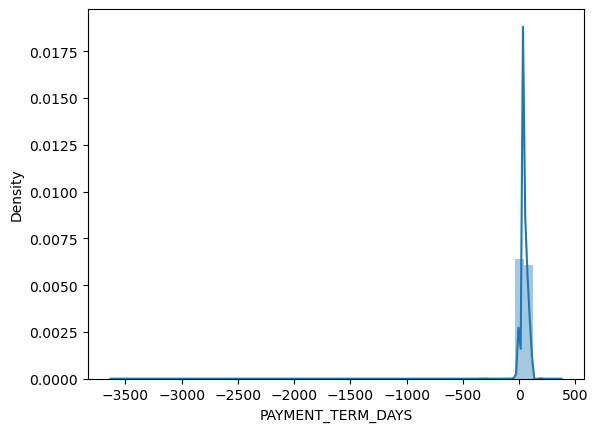

In [3739]:
sns.distplot(data.PAYMENT_TERM_DAYS)
plt.show()

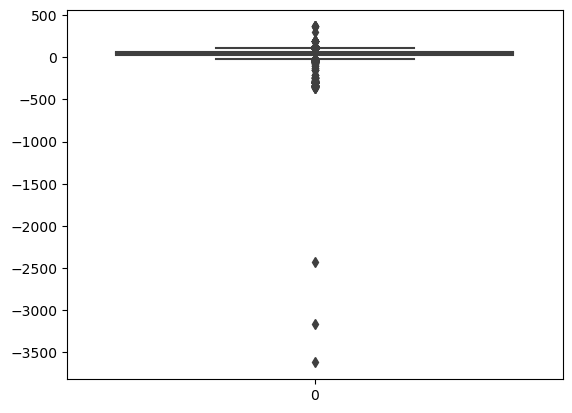

In [3740]:
sns.boxplot(data.PAYMENT_TERM_DAYS)
plt.show()

In [3741]:
data.PAYMENT_TERM_DAYS.quantile([0.01,0.99])

0.01     -9.0
0.99    111.9
Name: PAYMENT_TERM_DAYS, dtype: float64

In [3742]:
x=data[data['PAYMENT_TERM_DAYS']<0]
x['PAYMENT_TERM'].value_counts()

Immediate Payment        2164
Immediate                 788
100% Adv Payment           92
Cash on Delivery           87
30 Days from Inv Date      80
30 Days from EOM           21
EOM                        16
On Consignment              9
7 Days from Inv Date        1
45 Days from Inv Date       1
Name: PAYMENT_TERM, dtype: int64

lets remove the outliers in all the numeric data

In the case of PAYMENT_TERM_DAYS, it appears that there are lot of values less than 0 which appears to be not possible unless we cater for advance payments. So lets take 1 percentile is -9 as the lower limit for consideration, we can remove the remaining as outliers which could be due to data entry errors. However there are few data points above 99 percentile which is approx 112 days but payment term of 365 is possible so we will only remove the outliers at lower part of the data

In [3743]:
data=data[data['PAYMENT_TERM_DAYS']>=-9]

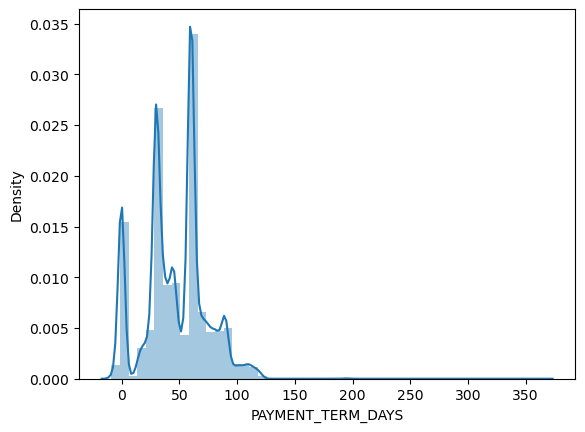

In [3744]:
sns.distplot(data.PAYMENT_TERM_DAYS)
plt.show()

there appears to be spikes in the data, so it maybe better bin the data

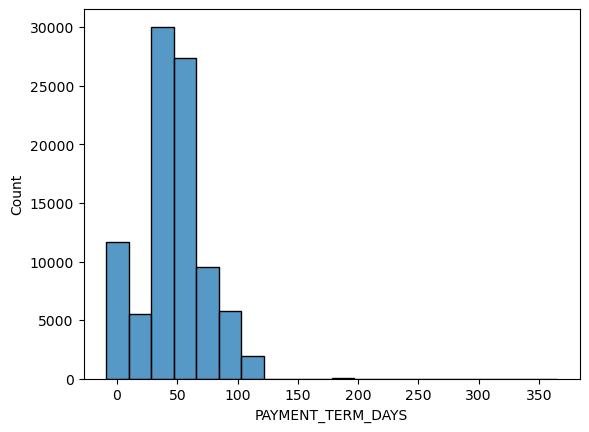

In [3745]:
sns.histplot(data.PAYMENT_TERM_DAYS,bins=20)
plt.show()

In [3746]:
bins = [-20,0,15,30,45,60,90,2000]

labels = [ "<0","0-15","15-30","30-45","45-60","60-90","90<"]


data['PAYMENT_TERM_BIN'] = pd.cut(data.PAYMENT_TERM_DAYS, bins=bins, labels=labels)

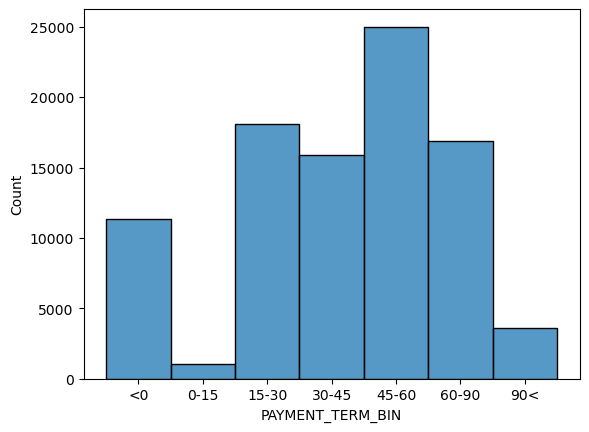

In [3747]:
sns.histplot(data.PAYMENT_TERM_BIN)
plt.show()

PAYMENT_TERM can also be dropped since numric column PAYMENT_TERM_DAYS is created

In [3748]:
drop_cols.append('PAYMENT_TERM')

Lets do the outlier analysis of the numeric columns

In [3749]:
num_cols=data.describe().columns

In [3750]:
def uni_num(data,col):
    plt.subplot(2,1,1)
    sns.distplot(data[col])
    plt.title(col)
    plt.subplot(2,1,2)
    sns.boxplot(x=data[col])
    plt.title(col)
    plt.show()

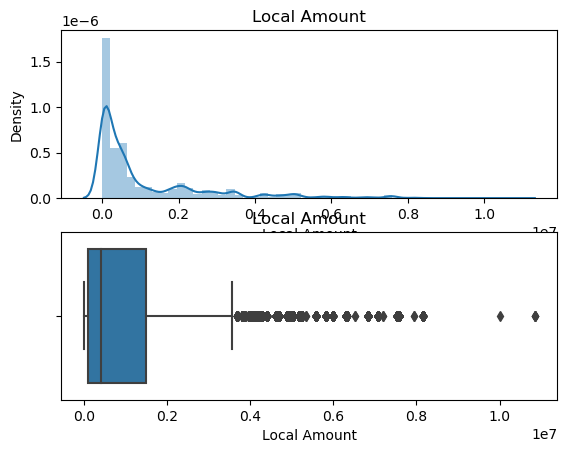

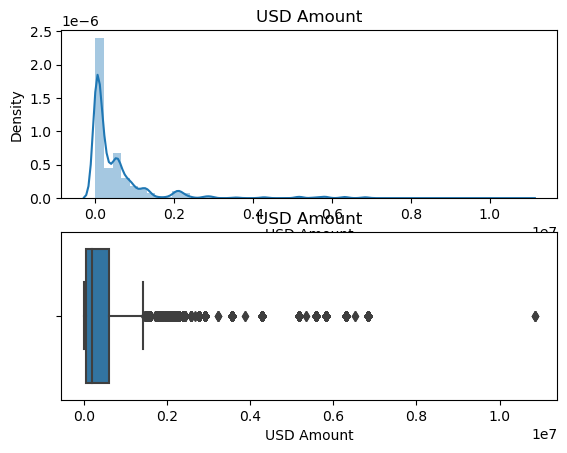

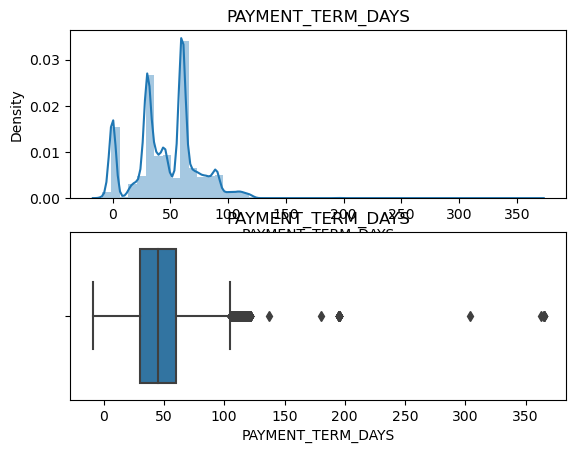

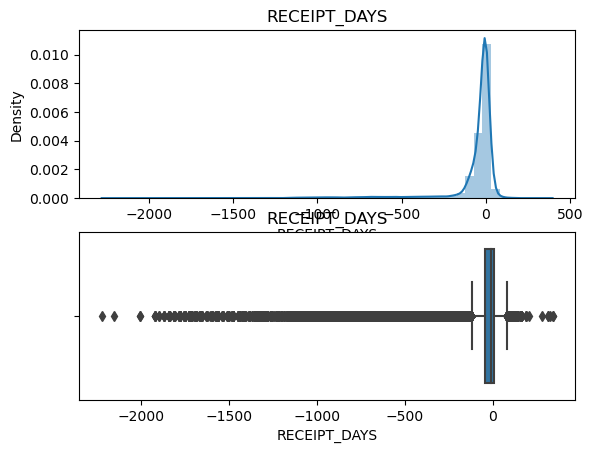

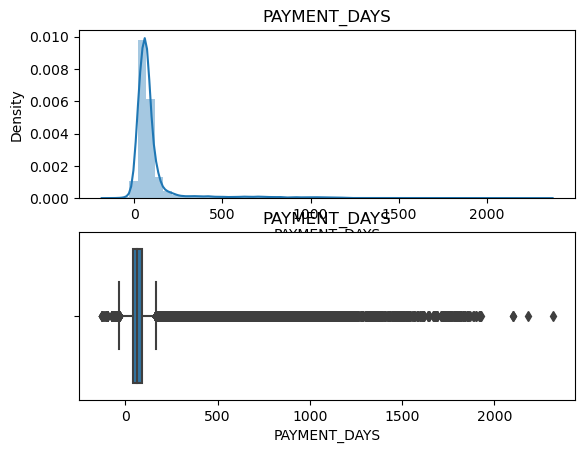

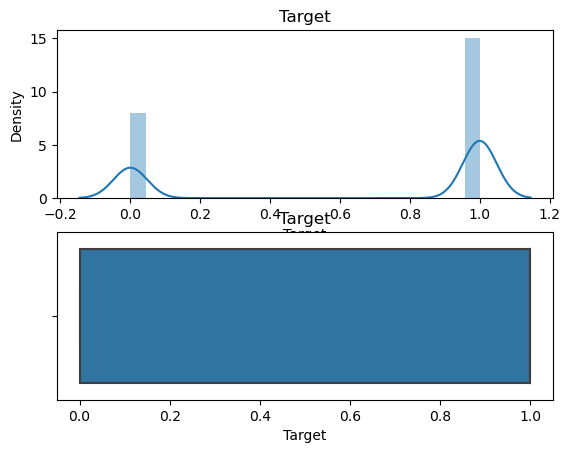

In [3751]:
for column in num_cols:
    uni_num(data,column)

Bi-variate analysis of numeric columns

<Figure size 1000x1000 with 0 Axes>

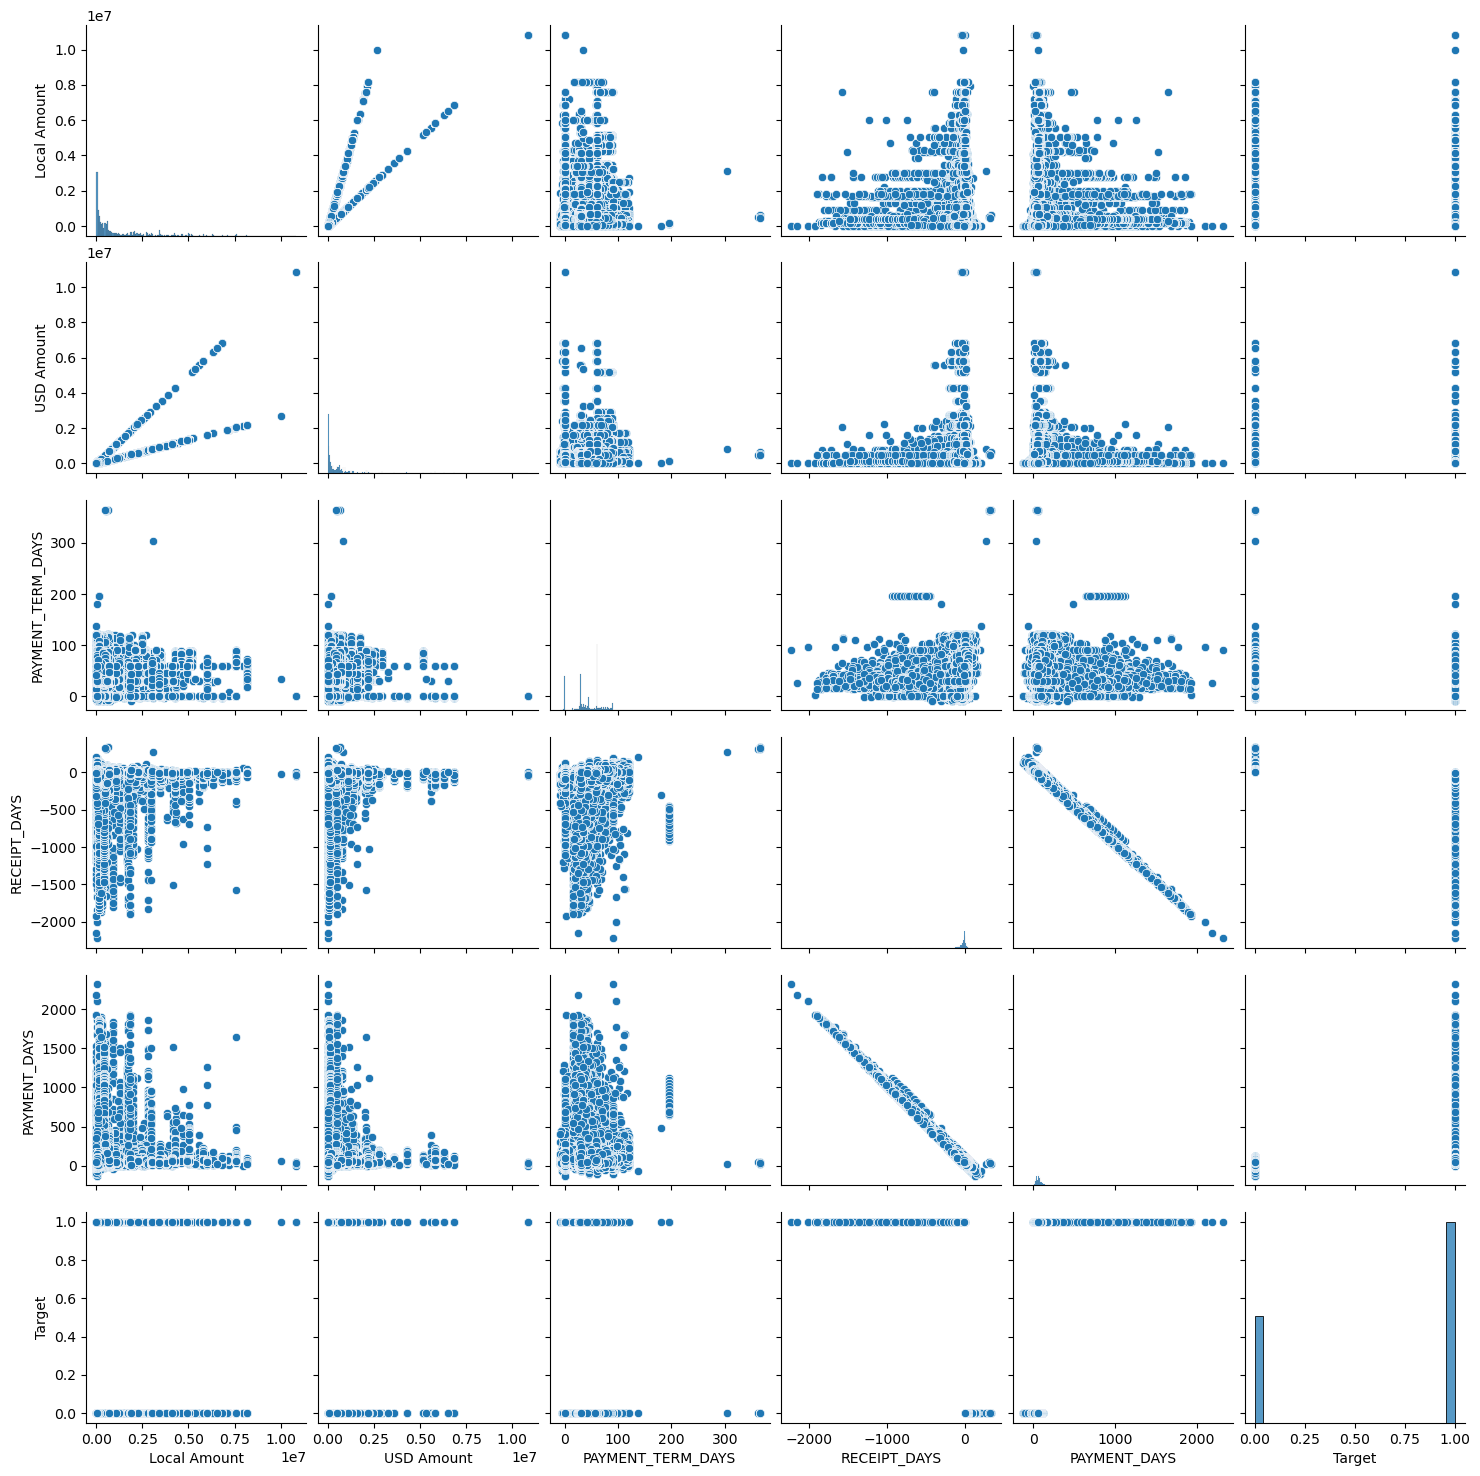

In [3752]:
plt.figure(figsize=[10,10])
sns.pairplot(data[num_cols])
plt.show()

<Axes: xlabel='USD Amount', ylabel='Density'>

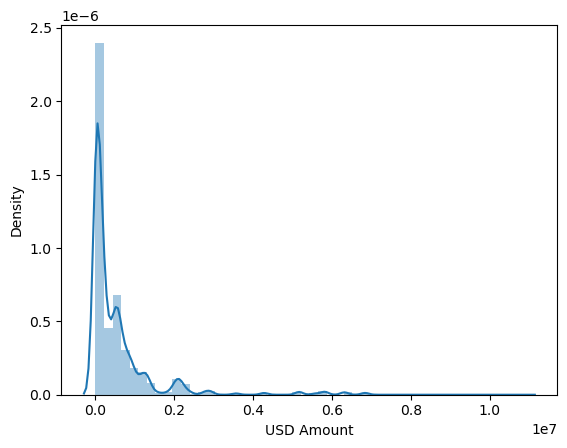

In [3753]:
sns.distplot(data['USD Amount'])

<Axes: >

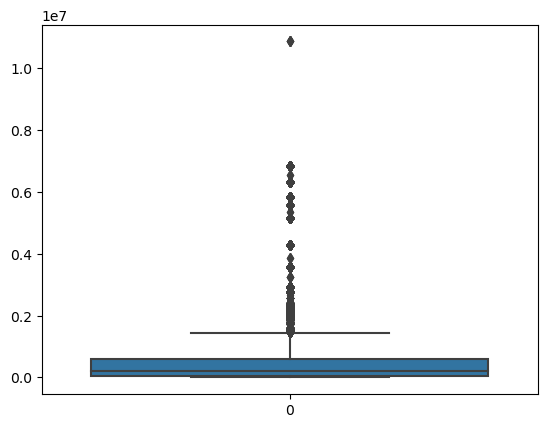

In [3754]:
sns.boxplot(data['USD Amount'])

In [3755]:
data['USD Amount log']=np.log(data['USD Amount'])

<Axes: xlabel='USD Amount log', ylabel='Density'>

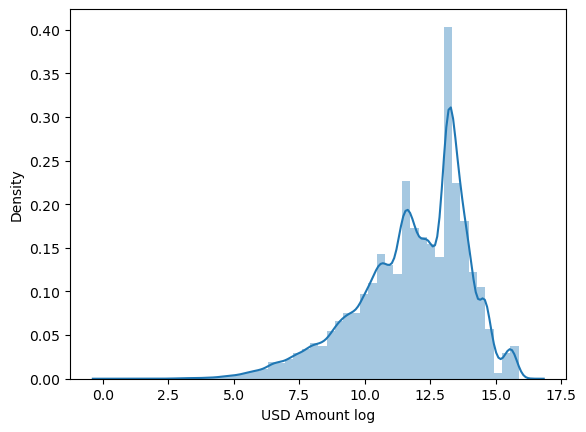

In [3756]:
sns.distplot(data['USD Amount log'])

<Axes: >

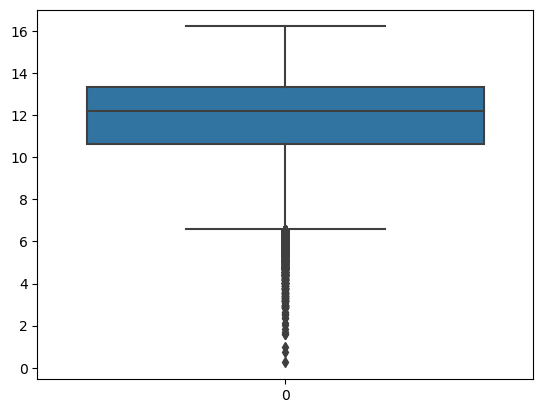

In [3757]:
sns.boxplot(data['USD Amount log'])

USD Amount in Log scale appears to be better to use for modelling

In [3758]:
data['Local Amount log']=np.log(data['Local Amount'])

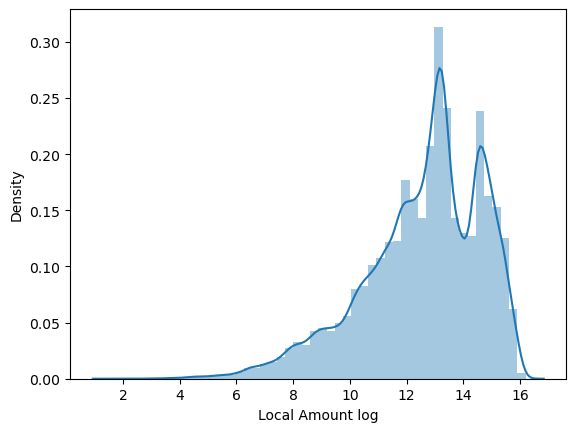

In [3759]:
sns.distplot(data['Local Amount log'])
plt.show()

Creating a column called Amount_ratio incase any relation can be picked up during ML

In [3760]:
data['Amount_ratio']=data['USD Amount']/data['Local Amount']

In [3761]:
drop_cols.extend(['USD Amount','Local Amount'])

PAYMENT_TERM can also be dropped since numric column PAYMENT_TERM_DAYS is created

drop PAYMENT_TERM_DAYS sins BINs are created

In [3762]:
drop_cols.append('PAYMENT_TERM_DAYS')

In [3763]:
drop_cols

['INVOICE_ALLOCATED',
 'PAYMENT_TERM',
 'USD Amount',
 'Local Amount',
 'PAYMENT_TERM_DAYS']

# Deleting the columns

In [3764]:
data.drop(drop_cols,axis=1,inplace=True)

In [3765]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91905 entries, 0 to 93936
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   RECEIPT_METHOD         91905 non-null  object  
 1   CUSTOMER_NAME          91905 non-null  object  
 2   CUSTOMER_NUMBER        91905 non-null  object  
 3   CURRENCY_CODE          91905 non-null  object  
 4   INVOICE_CLASS          91905 non-null  object  
 5   INVOICE_CURRENCY_CODE  91905 non-null  object  
 6   INVOICE_TYPE           91905 non-null  object  
 7   RECEIPT_DAYS           91905 non-null  int64   
 8   PAYMENT_DAYS           91905 non-null  int64   
 9   Target                 91905 non-null  int64   
 10  PAYMENT_TERM_BIN       91905 non-null  category
 11  USD Amount log         91905 non-null  float64 
 12  Local Amount log       91905 non-null  float64 
 13  Amount_ratio           91905 non-null  float64 
dtypes: category(1), float64(3), int64(3), 

In [3766]:
num_cols=['RECEIPT_DAYS',
       'PAYMENT_DAYS', 'Target','USD Amount log','Local Amount log','Amount_ratio']

Univariate analysis of categorical variables

In [3767]:
data.columns[data.dtypes=='object']

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'CURRENCY_CODE',
       'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE', 'INVOICE_TYPE'],
      dtype='object')

In [3768]:
cat_cols=['RECEIPT_METHOD', 'CURRENCY_CODE',
       'INVOICE_CLASS', 'INVOICE_CURRENCY_CODE', 'INVOICE_TYPE','PAYMENT_TERM_BIN']

In [3769]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91905 entries, 0 to 93936
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   RECEIPT_METHOD         91905 non-null  object  
 1   CUSTOMER_NAME          91905 non-null  object  
 2   CUSTOMER_NUMBER        91905 non-null  object  
 3   CURRENCY_CODE          91905 non-null  object  
 4   INVOICE_CLASS          91905 non-null  object  
 5   INVOICE_CURRENCY_CODE  91905 non-null  object  
 6   INVOICE_TYPE           91905 non-null  object  
 7   RECEIPT_DAYS           91905 non-null  int64   
 8   PAYMENT_DAYS           91905 non-null  int64   
 9   Target                 91905 non-null  int64   
 10  PAYMENT_TERM_BIN       91905 non-null  category
 11  USD Amount log         91905 non-null  float64 
 12  Local Amount log       91905 non-null  float64 
 13  Amount_ratio           91905 non-null  float64 
dtypes: category(1), float64(3), int64(3), 

In [3770]:
data.isnull().sum()

RECEIPT_METHOD           0
CUSTOMER_NAME            0
CUSTOMER_NUMBER          0
CURRENCY_CODE            0
INVOICE_CLASS            0
INVOICE_CURRENCY_CODE    0
INVOICE_TYPE             0
RECEIPT_DAYS             0
PAYMENT_DAYS             0
Target                   0
PAYMENT_TERM_BIN         0
USD Amount log           0
Local Amount log         0
Amount_ratio             0
dtype: int64

In [3771]:
for column in cat_cols:
    print(column)
    print(data[column].value_counts(normalize=True)*100)
    print('___________________________________________________')
    

RECEIPT_METHOD
WIRE             89.667592
AP/AR Netting     5.236929
CHEQUE            3.777814
CASH              0.850879
I/C WIRE          0.229585
PDC               0.228497
I/C Check         0.006528
I/C CASH          0.002176
Name: RECEIPT_METHOD, dtype: float64
___________________________________________________
CURRENCY_CODE
AED    38.735651
SAR    38.531092
USD    20.949894
EUR     1.564659
GBP     0.141450
BHD     0.064197
KWD     0.010881
QAR     0.002176
Name: CURRENCY_CODE, dtype: float64
___________________________________________________
INVOICE_CLASS
INV    94.42903
CM      4.97035
DM      0.60062
Name: INVOICE_CLASS, dtype: float64
___________________________________________________
INVOICE_CURRENCY_CODE
SAR    41.466732
AED    34.533486
USD    19.853109
EUR     1.650617
KWD     1.183831
QAR     0.664817
BHD     0.435232
GBP     0.145803
JOD     0.041347
ZAR     0.025026
Name: INVOICE_CURRENCY_CODE, dtype: float64
___________________________________________________
INVO

Lets reduce the number of categories in few columns with lot of categories

since AED, SAR, USD are significantly higher instances then other currencies, lets club all remaining currencies as Others in both currency code columns

In [3772]:
data['CURRENCY_CODE']=data['CURRENCY_CODE'].apply(lambda x: x if x in ['AED','SAR','USD'] else 'Others')
data['INVOICE_CURRENCY_CODE']=data['INVOICE_CURRENCY_CODE'].apply(lambda x: x if x in ['AED','SAR','USD'] else 'Others')

Lets club the less number of categories in RECEIPT_METHOD

In [3773]:
data['RECEIPT_METHOD']=data['RECEIPT_METHOD'].apply(lambda x: x if x in ['WIRE','AP/AR Netting','CHEQUE'] else 'Others')

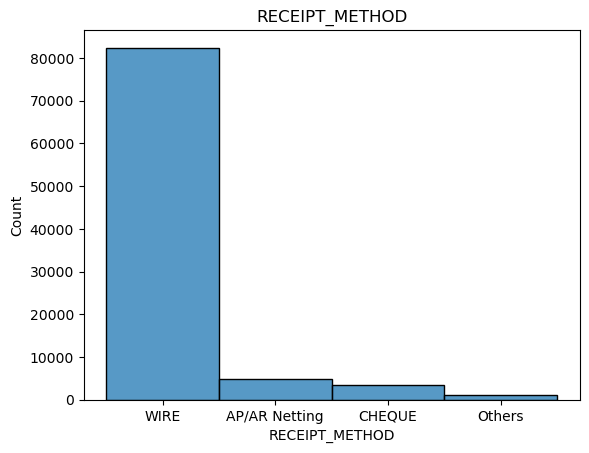

___________________________________________________


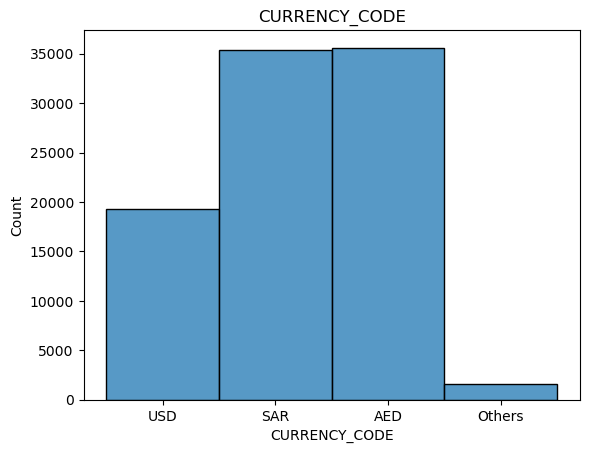

___________________________________________________


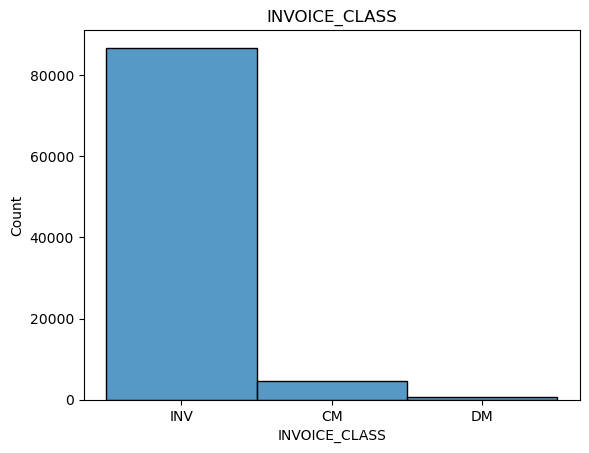

___________________________________________________


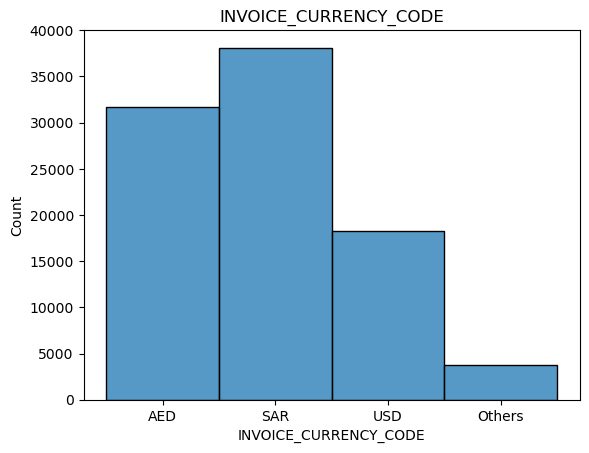

___________________________________________________


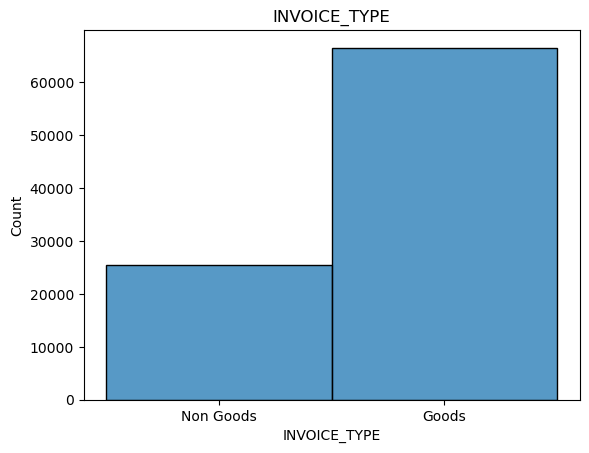

___________________________________________________


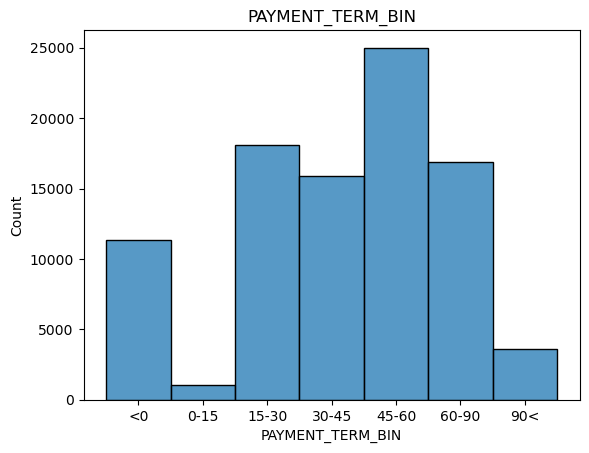

___________________________________________________


In [3774]:
for column in cat_cols:
    sns.histplot(data[column])
    plt.title(column)
    plt.show()
    print('___________________________________________________')

Bivariate analysis of categorical columns with numerical columns

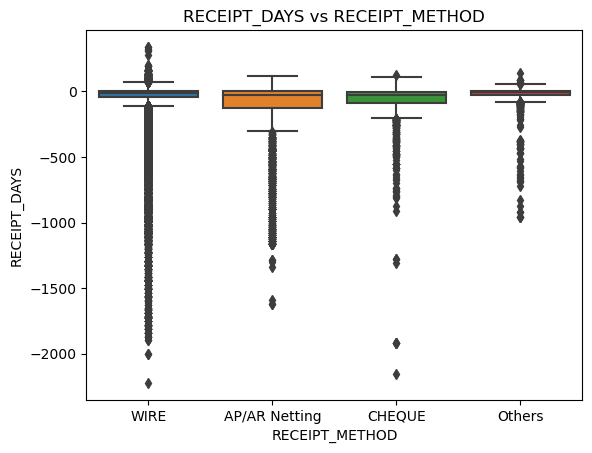

___________________________________________________


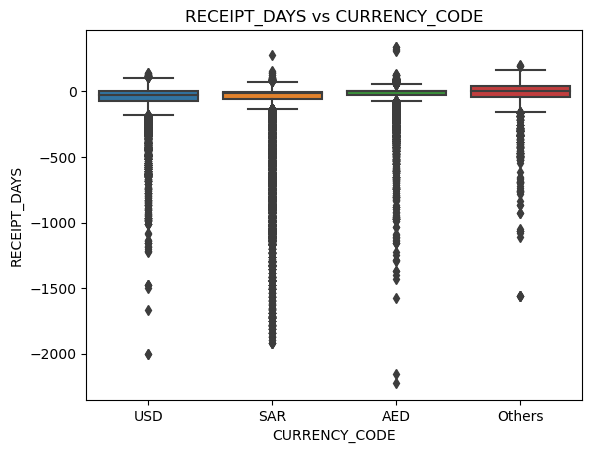

___________________________________________________


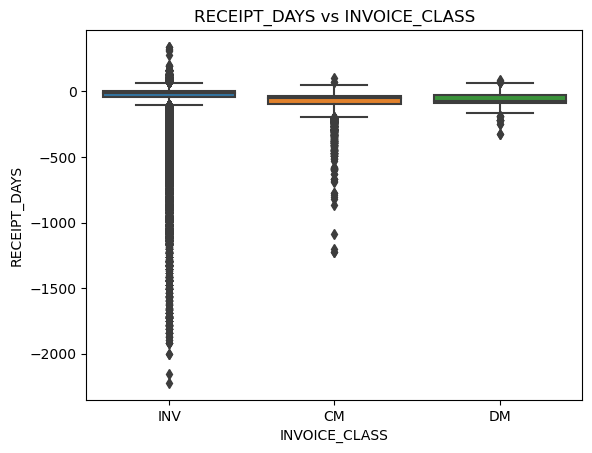

___________________________________________________


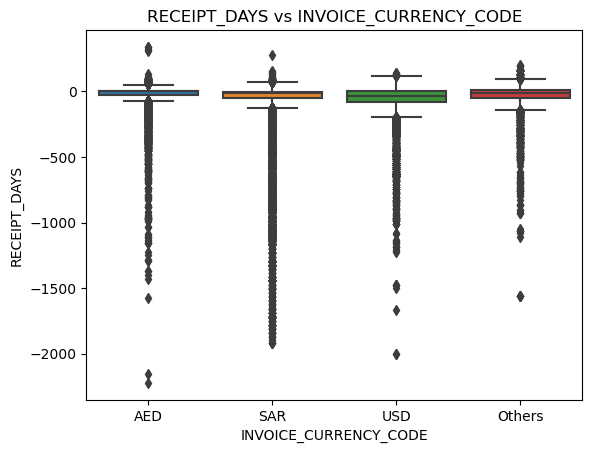

___________________________________________________


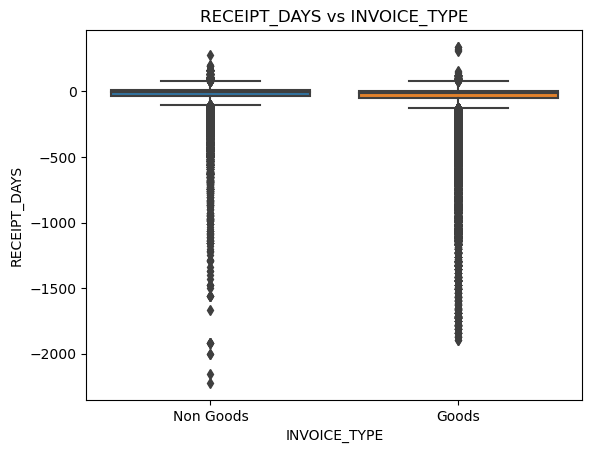

___________________________________________________


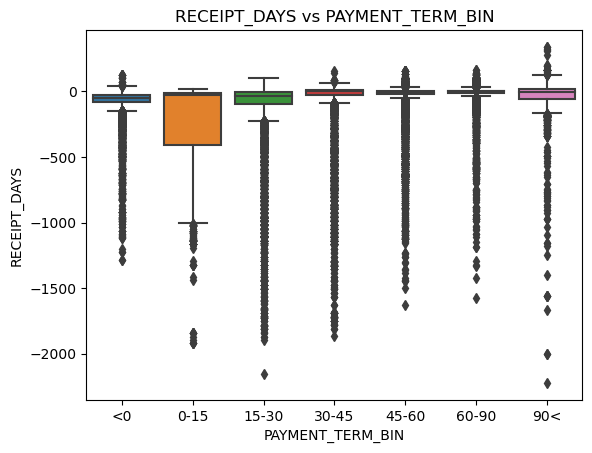

___________________________________________________


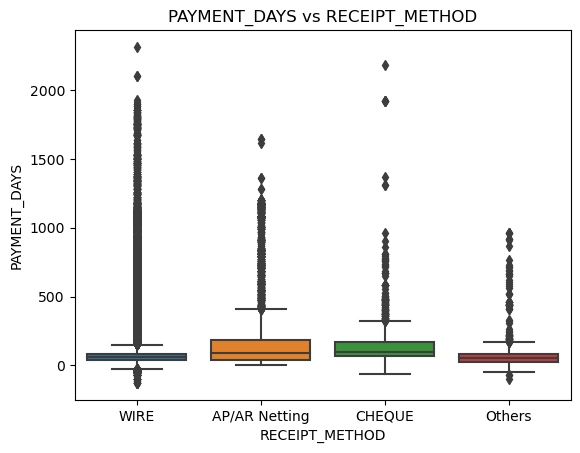

___________________________________________________


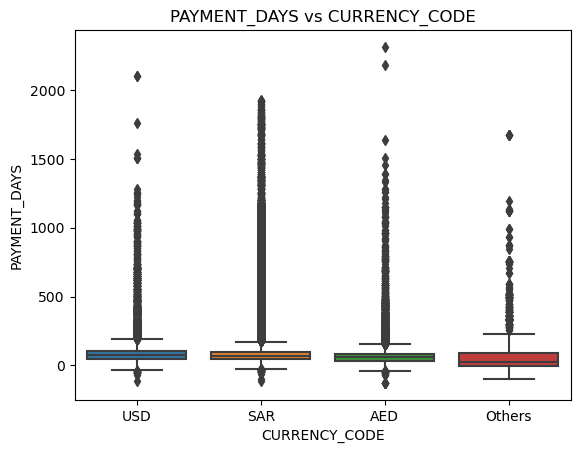

___________________________________________________


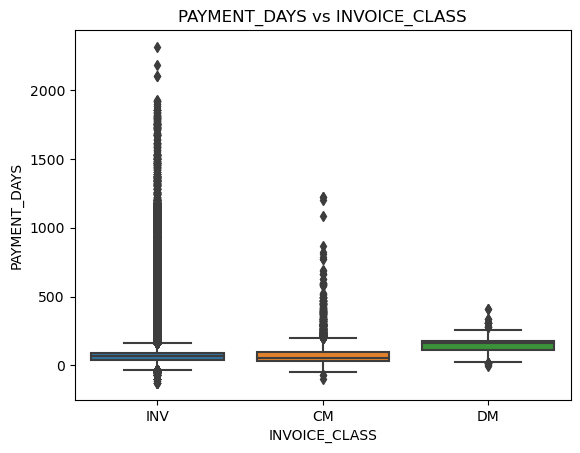

___________________________________________________


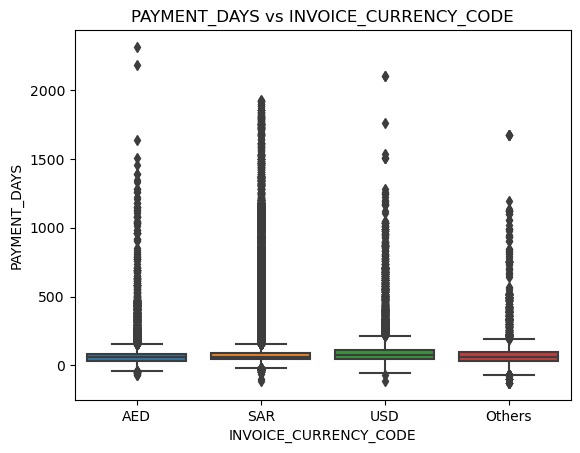

___________________________________________________


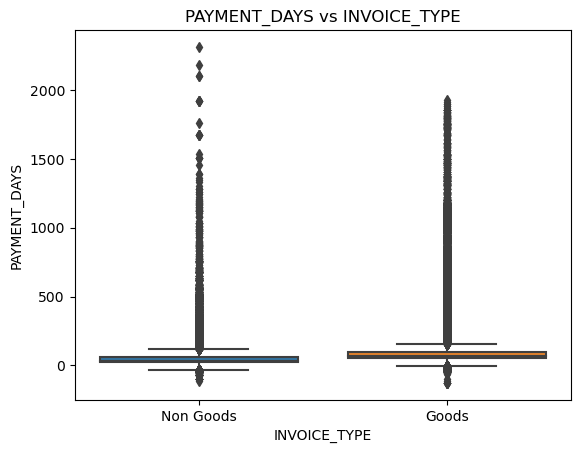

___________________________________________________


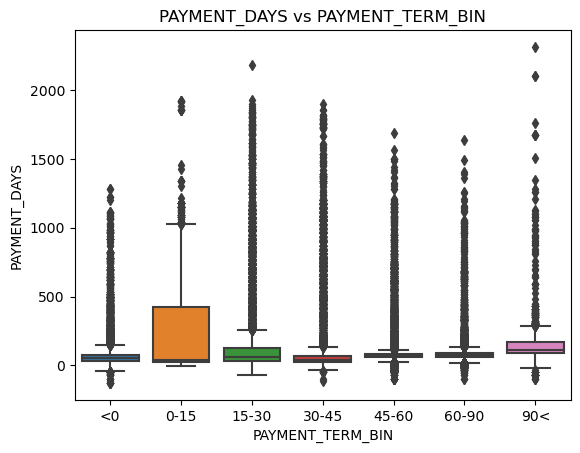

___________________________________________________


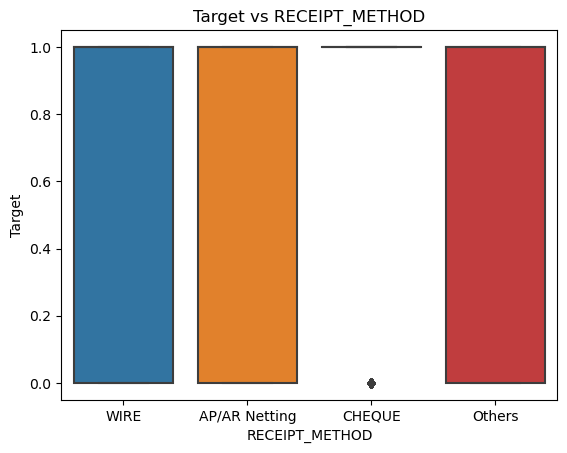

___________________________________________________


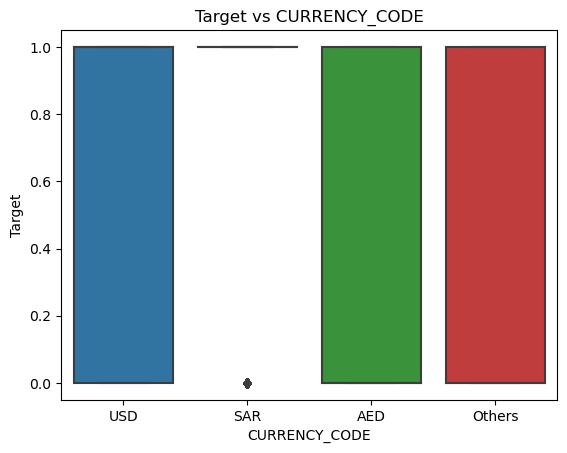

___________________________________________________


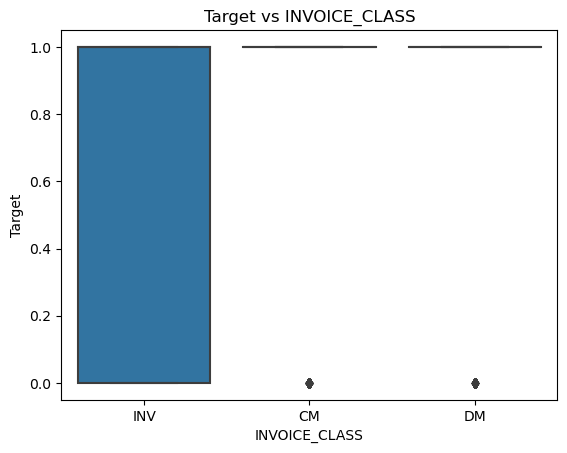

___________________________________________________


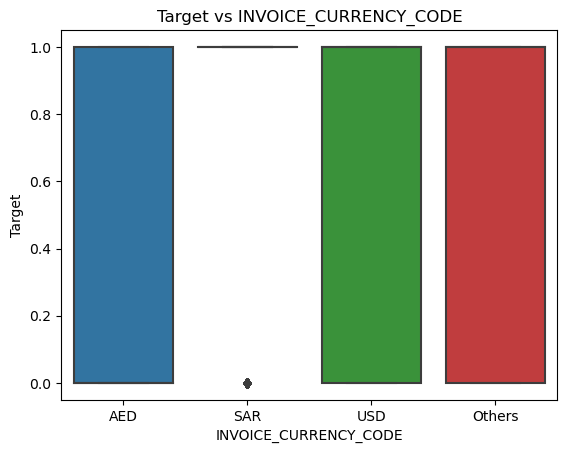

___________________________________________________


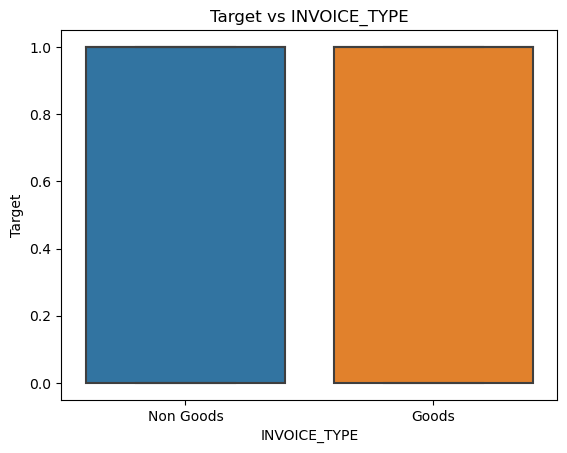

___________________________________________________


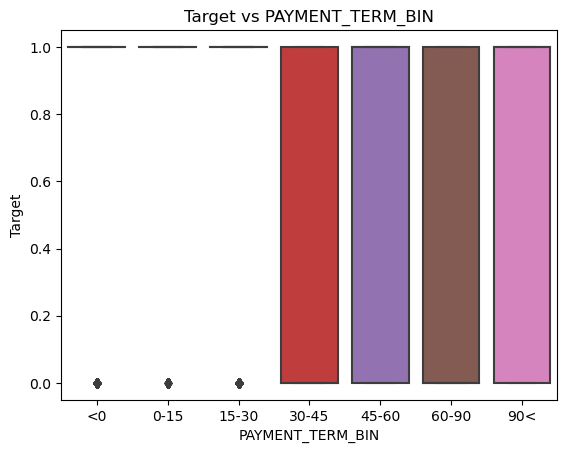

___________________________________________________


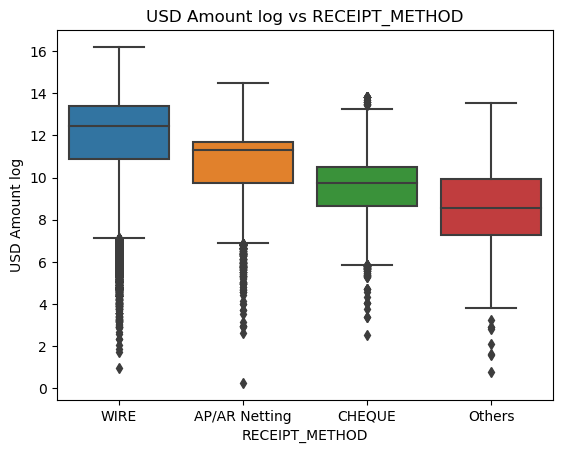

___________________________________________________


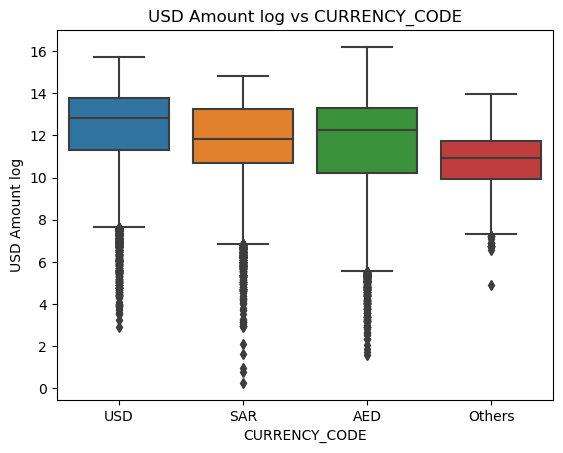

___________________________________________________


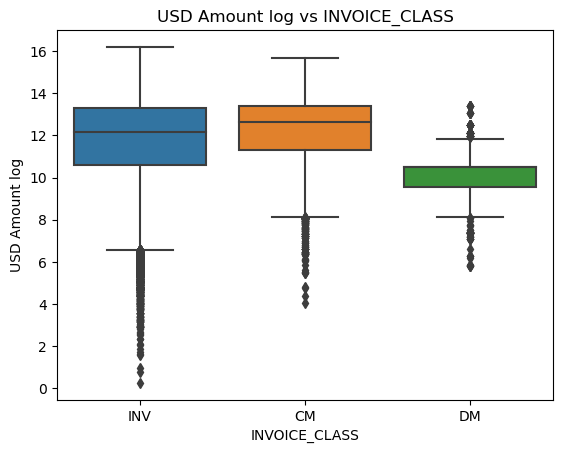

___________________________________________________


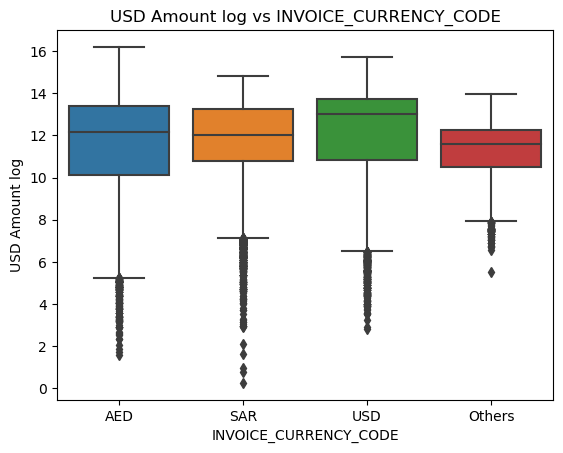

___________________________________________________


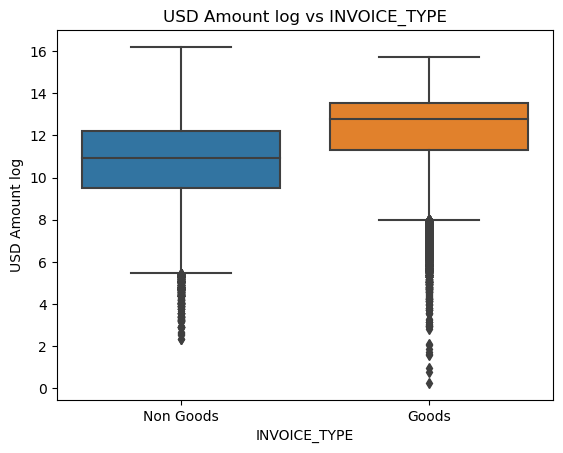

___________________________________________________


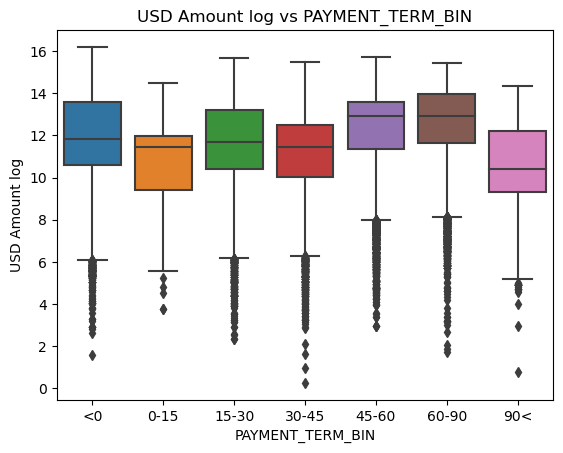

___________________________________________________


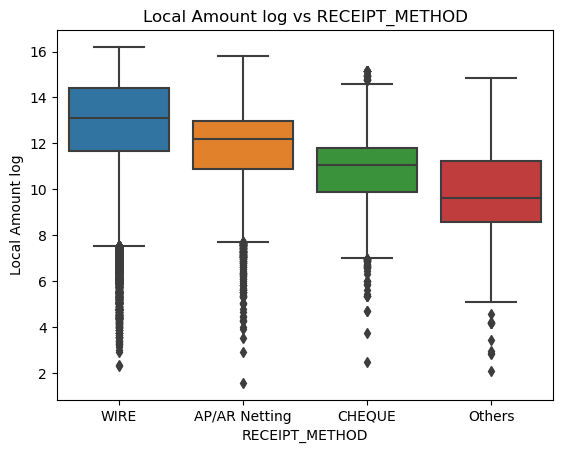

___________________________________________________


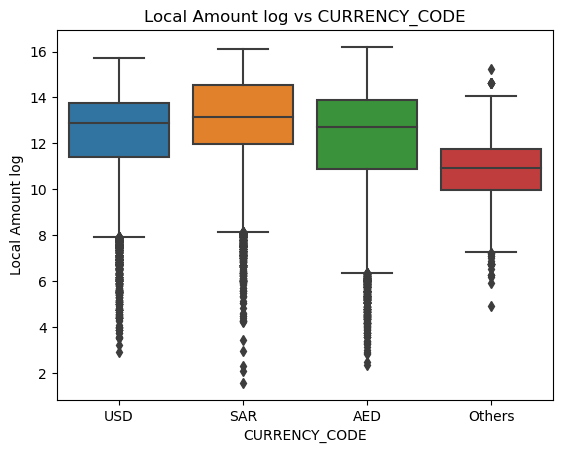

___________________________________________________


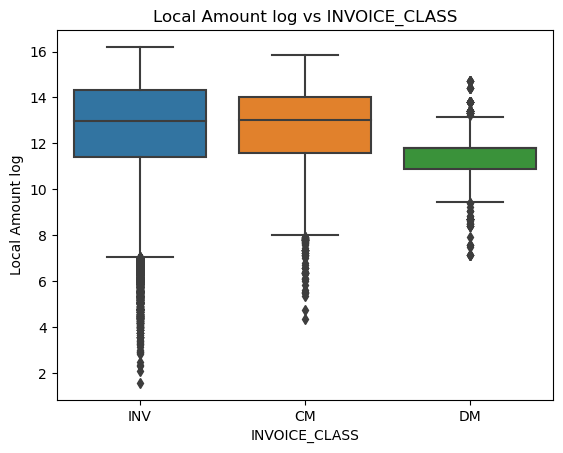

___________________________________________________


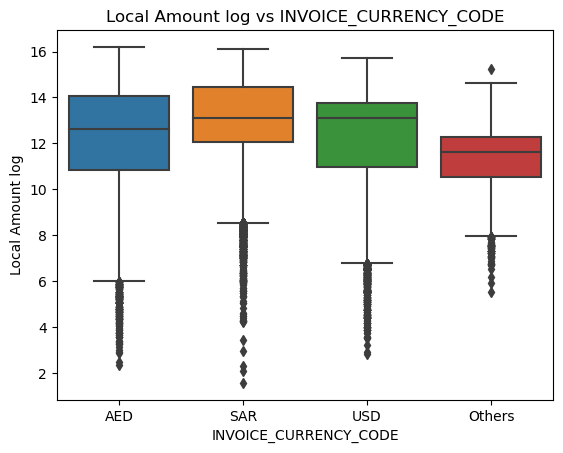

___________________________________________________


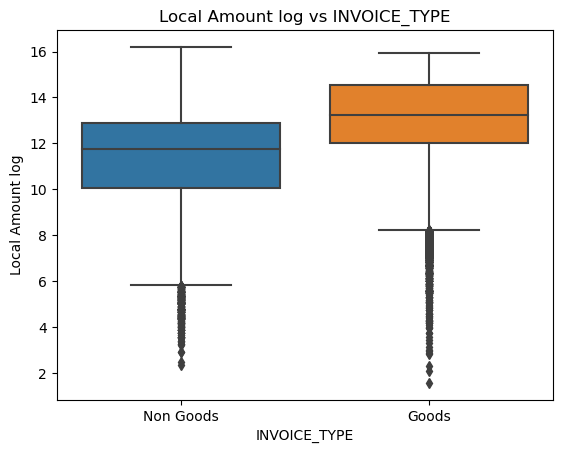

___________________________________________________


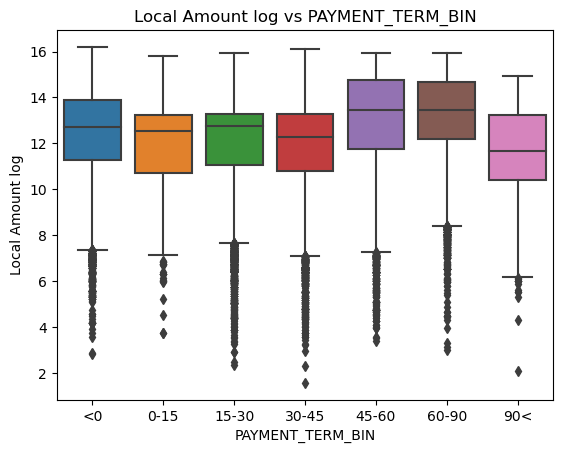

___________________________________________________


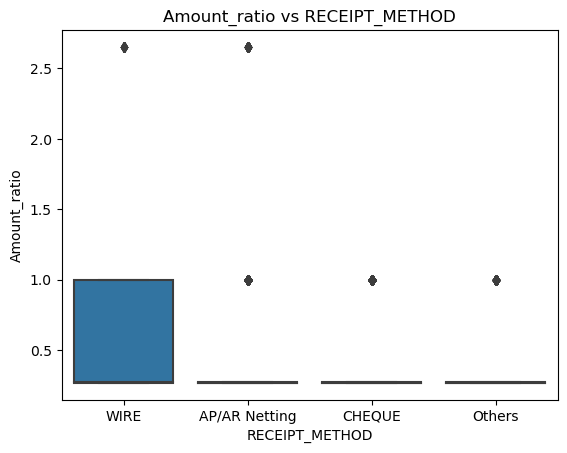

___________________________________________________


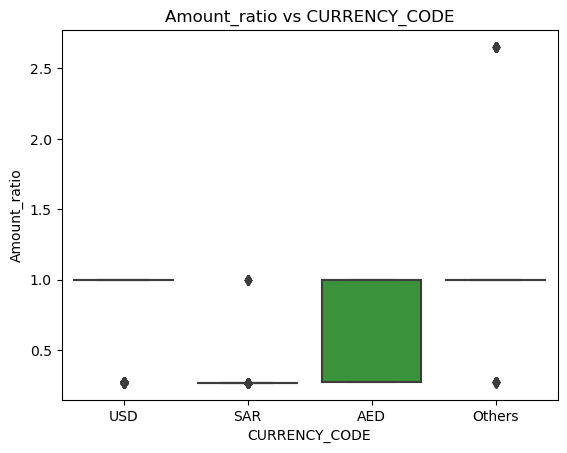

___________________________________________________


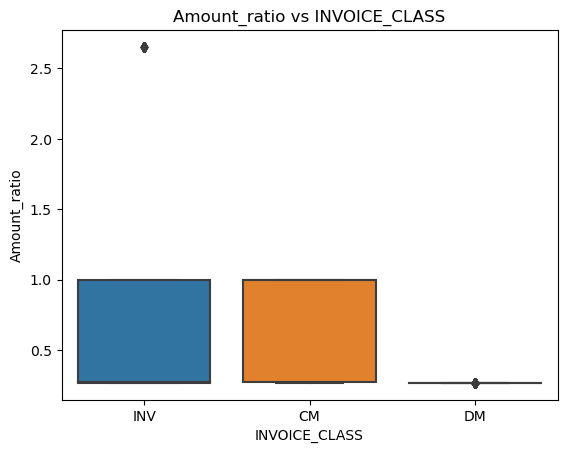

___________________________________________________


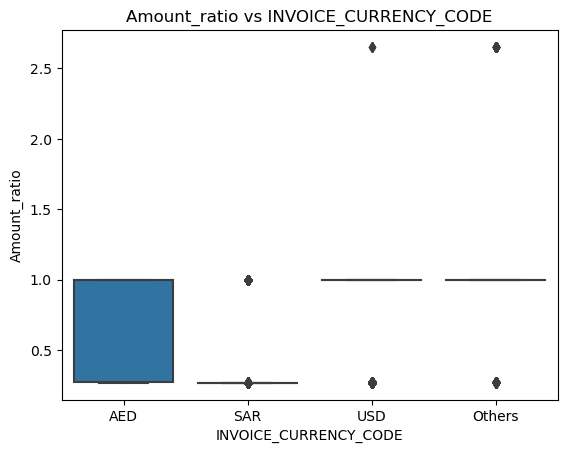

___________________________________________________


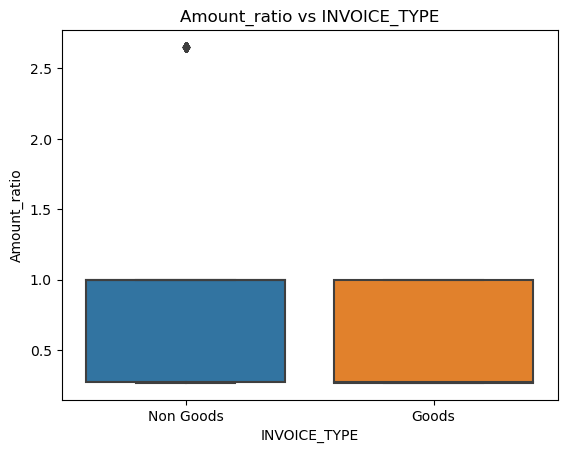

___________________________________________________


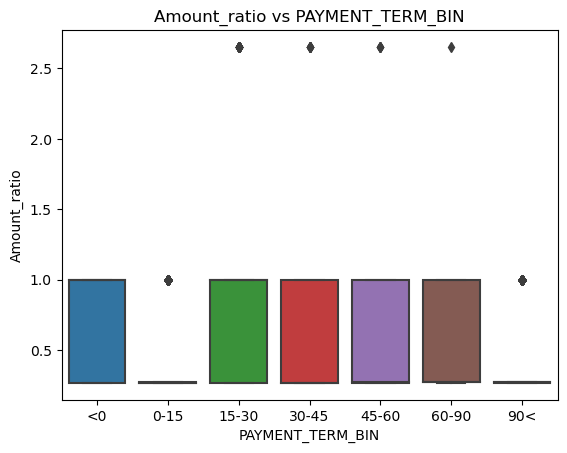

___________________________________________________


In [3775]:
for column1 in num_cols:
    for column2 in cat_cols:
        sns.boxplot(y=data[column1],x=data[column2])
        plt.title(column1+' vs '+column2)
        plt.show()
        print('___________________________________________________')

## Observations
No visible pattern can is exhibited in these plots. However few observations were made
- Among all the plots the relation between PAYMENT_TERM and RECEIPT_DAYS/PAYMENT_DAYS appears to be significantly indicated the quantum of delay in payments is higher in PAYMENT_TERMS 0-15 days. So the company may look into improving this to reduce major chunk of delays

## Creating a grouped data on CUSTOMER_NAME for creating derived variables for Customer_segmentation

In [4093]:
Customer_group_name=data.groupby('CUSTOMER_NAME').PAYMENT_DAYS.agg({'mean','std'})

In [4094]:
Customer_group_name.tail()

,mean,std
CUSTOMER_NAME,,
YOUS Corp,117.000000,33.949160
ZAHR Corp,144.928571,52.197059
ZAIN Corp,67.095238,46.326945
ZERO Corp,108.000000,72.746134
ZV F Corp,221.909091,112.881756


In [4095]:
Customer_group_name.isnull().sum()

mean     0
std     86
dtype: int64

std is Null for customers with only 1 transaction. So lets replace null values with 0

In [4096]:
Customer_group_name['std']=Customer_group_name['std'].fillna(0)

In [4097]:
Customer_group_name.isnull().sum()

mean    0
std     0
dtype: int64

In [4098]:
Customer_group_name.shape

(689, 2)

<Axes: >

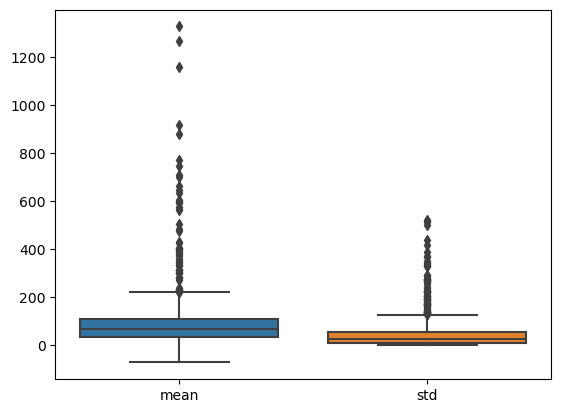

In [4099]:
sns.boxplot(Customer_group_name[['mean','std']])

<Axes: xlabel='std', ylabel='mean'>

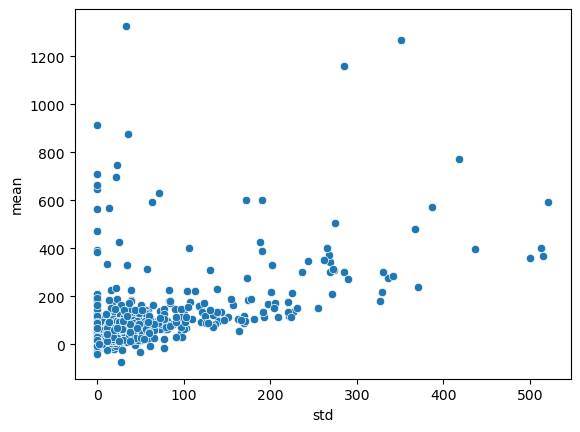

In [4100]:
sns.scatterplot(y='mean',x='std', data=Customer_group_name)

In [4101]:
from sklearn.preprocessing import StandardScaler

In [4102]:
scaler=StandardScaler()
Customer_group_name_scaled=scaler.fit_transform(Customer_group_name[['mean','std']])

In [4069]:
Customer_group_name_scaled.shape

(689, 2)

In [4070]:
Customer_group_name_scaled=pd.DataFrame(Customer_group_name_scaled)
Customer_group_name_scaled.columns=['mean','std']
Customer_group_name_scaled.head()

,mean,std
0,-0.535182,-0.488624
1,-0.419742,-0.552830
2,-0.386606,0.019627
3,-0.592421,-0.654845
4,-0.166046,0.049616


In [4071]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [4072]:
hopkins(Customer_group_name_scaled)

0.9655707118910056

In [4073]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4074]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(Customer_group_name_scaled)

KMeans(max_iter=50, n_clusters=4)

Optimal number of clusters

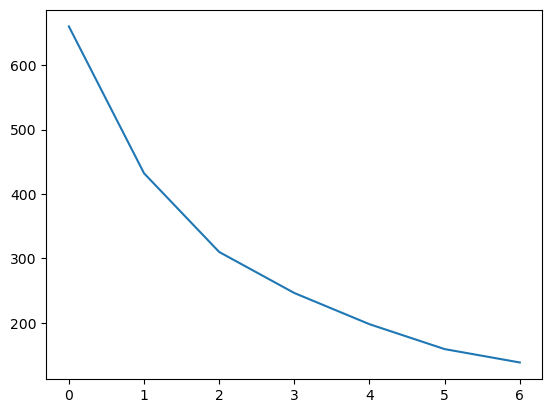

In [4075]:
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Customer_group_name_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [4076]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Customer_group_name_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(Customer_group_name_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.7567651441123403
For n_clusters=3, the silhouette score is 0.7463034959835374
For n_clusters=4, the silhouette score is 0.6231640719866387
For n_clusters=5, the silhouette score is 0.6210148734522729
For n_clusters=6, the silhouette score is 0.5271134120729237
For n_clusters=7, the silhouette score is 0.43652644988814837
For n_clusters=8, the silhouette score is 0.4411434443634031


#### 2 Clusters appear to be ideal based on silhoutte score 

In [4077]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=2, max_iter=50,random_state=42)
kmeans.fit(Customer_group_name_scaled)

KMeans(max_iter=50, n_clusters=2, random_state=42)

In [4078]:
# assign the label
Customer_group_name['cluster_id'] = kmeans.labels_
Customer_group_name.head()

,mean,std,cluster_id
CUSTOMER_NAME,,,
3D D Corp,24.176471,12.958447,1
6TH Corp,40.666667,7.952987,1
A3 D Corp,45.400000,52.581366,1
ABC Corp,16.000000,0.000000,1
ABDU Corp,76.906250,54.919326,1


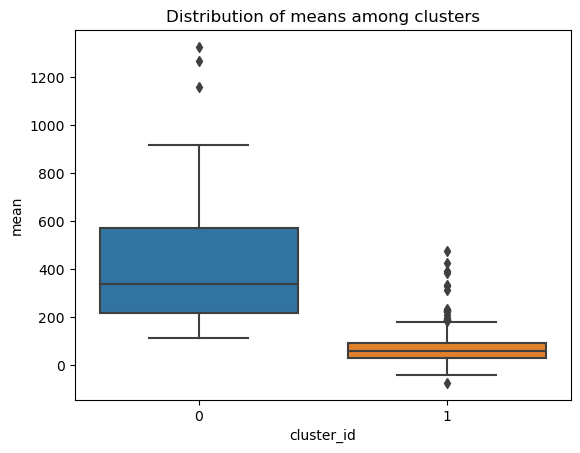

In [4079]:
sns.boxplot(y='mean',x='cluster_id',data=Customer_group_name)
plt.title('Distribution of means among clusters')
plt.show()

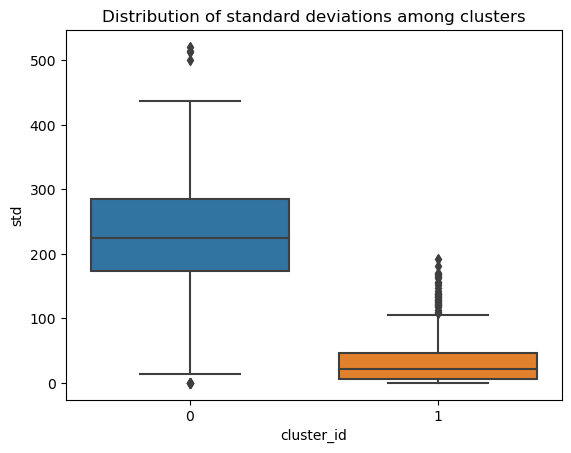

In [4080]:
sns.boxplot(y='std',x='cluster_id',data=Customer_group_name)
plt.title('Distribution of standard deviations among clusters')
plt.show()

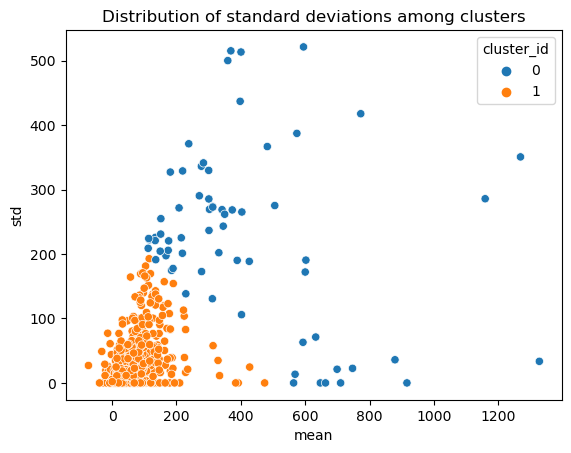

In [4081]:
sns.scatterplot(y='std',x='mean',hue='cluster_id',data=Customer_group_name)
plt.title('Distribution of standard deviations among clusters')
plt.show()

# Customer Segments
There appears to be 2 Customer segments
- Cluster_labe 0: High mean  and high standard deviation Payment_time
- Cluster_labe 1: low mean  and low standard deviation Payment_time


In [3804]:
Customer_group_name.head()

,mean,std,cluster_id
CUSTOMER_NAME,,,
3D D Corp,24.176471,12.958447,1
6TH Corp,40.666667,7.952987,1
A3 D Corp,45.400000,52.581366,1
ABC Corp,16.000000,0.000000,1
ABDU Corp,76.906250,54.919326,1


In [3805]:
Customer_group_name.drop(['mean','std'],axis=1,inplace=True)

In [3806]:
Customer_group_name=Customer_group_name.reset_index()

In [3807]:
Customer_group_name.head()

,CUSTOMER_NAME,cluster_id
0,3D D Corp,1
1,6TH Corp,1
2,A3 D Corp,1
3,ABC Corp,1
4,ABDU Corp,1


In [3808]:
data=pd.merge(data,Customer_group_name,how='left',on='CUSTOMER_NAME')

In [3809]:
data.isnull().sum()

RECEIPT_METHOD           0
CUSTOMER_NAME            0
CUSTOMER_NUMBER          0
CURRENCY_CODE            0
INVOICE_CLASS            0
INVOICE_CURRENCY_CODE    0
INVOICE_TYPE             0
RECEIPT_DAYS             0
PAYMENT_DAYS             0
Target                   0
PAYMENT_TERM_BIN         0
USD Amount log           0
Local Amount log         0
Amount_ratio             0
cluster_id               0
dtype: int64

In [3810]:
data.Target.value_counts(normalize=True)

1    0.653142
0    0.346858
Name: Target, dtype: float64

It appears that the data is not having heavey class imbalance

# Now it is a classification problem 

In [3811]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91905 entries, 0 to 91904
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   RECEIPT_METHOD         91905 non-null  object  
 1   CUSTOMER_NAME          91905 non-null  object  
 2   CUSTOMER_NUMBER        91905 non-null  object  
 3   CURRENCY_CODE          91905 non-null  object  
 4   INVOICE_CLASS          91905 non-null  object  
 5   INVOICE_CURRENCY_CODE  91905 non-null  object  
 6   INVOICE_TYPE           91905 non-null  object  
 7   RECEIPT_DAYS           91905 non-null  int64   
 8   PAYMENT_DAYS           91905 non-null  int64   
 9   Target                 91905 non-null  int64   
 10  PAYMENT_TERM_BIN       91905 non-null  category
 11  USD Amount log         91905 non-null  float64 
 12  Local Amount log       91905 non-null  float64 
 13  Amount_ratio           91905 non-null  float64 
 14  cluster_id             91905 non-null 

In [3812]:
data['cluster_id']=data['cluster_id'].astype('object')

lets drop the CUSTOMER_NAME and CUSTOMER_NUMBER, since they are only identifiers without any predicitve value. We also drop RECEIP_DAYS and PAYMENT_DAYS from the data used for modelling because this data wouldnt be available for open invoices

In [3813]:
model_data=data.drop(['CUSTOMER_NAME','CUSTOMER_NUMBER','PAYMENT_DAYS','RECEIPT_DAYS'],axis=1)

In [3814]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91905 entries, 0 to 91904
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   RECEIPT_METHOD         91905 non-null  object  
 1   CURRENCY_CODE          91905 non-null  object  
 2   INVOICE_CLASS          91905 non-null  object  
 3   INVOICE_CURRENCY_CODE  91905 non-null  object  
 4   INVOICE_TYPE           91905 non-null  object  
 5   Target                 91905 non-null  int64   
 6   PAYMENT_TERM_BIN       91905 non-null  category
 7   USD Amount log         91905 non-null  float64 
 8   Local Amount log       91905 non-null  float64 
 9   Amount_ratio           91905 non-null  float64 
 10  cluster_id             91905 non-null  object  
dtypes: category(1), float64(3), int64(1), object(6)
memory usage: 7.8+ MB


### Lets Go through open invoice data to decide on which data will be available in actual situation so that the features can decided

In [3815]:
df2=pd.read_csv('Open_Invoice_data.csv',encoding="ISO-8859-1")

In [3816]:
df2.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [3817]:
model_data.columns

Index(['RECEIPT_METHOD', 'CURRENCY_CODE', 'INVOICE_CLASS',
       'INVOICE_CURRENCY_CODE', 'INVOICE_TYPE', 'Target', 'PAYMENT_TERM_BIN',
       'USD Amount log', 'Local Amount log', 'Amount_ratio', 'cluster_id'],
      dtype='object')

- Transaction Currency  : In which currency the goods or services were sold
- CURRENCY_CODE         : Currency used for the payment
- INVOICE_CUURENCY_CODE : Currency code as per the invoice generated
Based on above definitin from Data dictionary, Transaction Currency and INVOICE_CURRENCY_CODE are same and the CURRENCY_CODE is not available in Open invoice data, so it has to be dropped
RECEPT_METHOD is not available for Open invoices so they need to be dropped before building model

In [3818]:
model_data.drop(['RECEIPT_METHOD','INVOICE_TYPE','CURRENCY_CODE'],axis=1,inplace=True)

In [3819]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91905 entries, 0 to 91904
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   INVOICE_CLASS          91905 non-null  object  
 1   INVOICE_CURRENCY_CODE  91905 non-null  object  
 2   Target                 91905 non-null  int64   
 3   PAYMENT_TERM_BIN       91905 non-null  category
 4   USD Amount log         91905 non-null  float64 
 5   Local Amount log       91905 non-null  float64 
 6   Amount_ratio           91905 non-null  float64 
 7   cluster_id             91905 non-null  object  
dtypes: category(1), float64(3), int64(1), object(3)
memory usage: 5.7+ MB


It appears that they is no direct relation visible between USD Amount, PAYMENT_TERM_DAYS with target variable. Lets model the data and find useful features during RFE

In [3820]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91905 entries, 0 to 91904
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   INVOICE_CLASS          91905 non-null  object  
 1   INVOICE_CURRENCY_CODE  91905 non-null  object  
 2   Target                 91905 non-null  int64   
 3   PAYMENT_TERM_BIN       91905 non-null  category
 4   USD Amount log         91905 non-null  float64 
 5   Local Amount log       91905 non-null  float64 
 6   Amount_ratio           91905 non-null  float64 
 7   cluster_id             91905 non-null  object  
dtypes: category(1), float64(3), int64(1), object(3)
memory usage: 5.7+ MB


<Axes: >

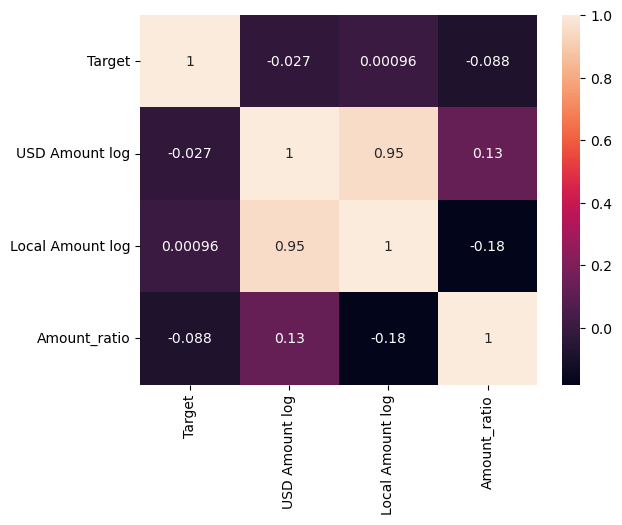

In [3821]:
sns.heatmap(model_data.corr(),annot=True)

However lets derive another variable to cater for the local amount and usd amount differences

drop Local Amount  log

In [3822]:
model_data.drop('Local Amount log',axis=1,inplace=True)

In [3823]:
model_data_dt=model_data.copy()

In [3824]:
model_data.columns

Index(['INVOICE_CLASS', 'INVOICE_CURRENCY_CODE', 'Target', 'PAYMENT_TERM_BIN',
       'USD Amount log', 'Amount_ratio', 'cluster_id'],
      dtype='object')

In [3825]:
#Categorical columns
cat_cols=['INVOICE_CURRENCY_CODE', 'INVOICE_CLASS','PAYMENT_TERM_BIN','cluster_id']

In [3826]:
# Creating Dummy variables

In [3827]:
Dummies=pd.get_dummies(model_data[cat_cols])

In [3828]:
Dummies.head()

,INVOICE_CURRENCY_CODE_AED,INVOICE_CURRENCY_CODE_Others,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CLASS_CM,INVOICE_CLASS_DM,INVOICE_CLASS_INV,PAYMENT_TERM_BIN_<0,PAYMENT_TERM_BIN_0-15,PAYMENT_TERM_BIN_15-30,PAYMENT_TERM_BIN_30-45,PAYMENT_TERM_BIN_45-60,PAYMENT_TERM_BIN_60-90,PAYMENT_TERM_BIN_90<,cluster_id_0,cluster_id_1
0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
2,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
3,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
4,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1


# Not dropping the extra dummies since we are planning to use automated feature selection. This would help in matching the feeder data of the Open invoices to the ML in similar formate

In [3829]:
# Dummies.drop(['INVOICE_CLASS_CM','INVOICE_CURRENCY_CODE_Others','PAYMENT_TERM_BIN_<0','cluster_id_1'],axis=1,inplace=True)

In [3830]:
model_data=pd.concat([model_data,Dummies],axis=1)

In [3831]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91905 entries, 0 to 91904
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   INVOICE_CLASS                 91905 non-null  object  
 1   INVOICE_CURRENCY_CODE         91905 non-null  object  
 2   Target                        91905 non-null  int64   
 3   PAYMENT_TERM_BIN              91905 non-null  category
 4   USD Amount log                91905 non-null  float64 
 5   Amount_ratio                  91905 non-null  float64 
 6   cluster_id                    91905 non-null  object  
 7   INVOICE_CURRENCY_CODE_AED     91905 non-null  uint8   
 8   INVOICE_CURRENCY_CODE_Others  91905 non-null  uint8   
 9   INVOICE_CURRENCY_CODE_SAR     91905 non-null  uint8   
 10  INVOICE_CURRENCY_CODE_USD     91905 non-null  uint8   
 11  INVOICE_CLASS_CM              91905 non-null  uint8   
 12  INVOICE_CLASS_DM              91905 non-null  

In [3832]:
model_data.drop(cat_cols,axis=1,inplace=True)

In [3833]:
model_data.head()

,Target,USD Amount log,Amount_ratio,INVOICE_CURRENCY_CODE_AED,INVOICE_CURRENCY_CODE_Others,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CLASS_CM,INVOICE_CLASS_DM,INVOICE_CLASS_INV,PAYMENT_TERM_BIN_<0,PAYMENT_TERM_BIN_0-15,PAYMENT_TERM_BIN_15-30,PAYMENT_TERM_BIN_30-45,PAYMENT_TERM_BIN_45-60,PAYMENT_TERM_BIN_60-90,PAYMENT_TERM_BIN_90<,cluster_id_0,cluster_id_1
0,1,11.523060,0.272294,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,1,10.799376,0.266613,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
2,0,10.645225,0.266613,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1
3,1,10.645225,0.266613,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0
4,1,10.645225,0.266613,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1


In [3834]:
model_data.shape

(91905, 19)

# Splitting the model_data as Train, test data

In [3835]:
from sklearn.model_selection import train_test_split

In [3836]:
df_train, df_test = train_test_split(model_data, train_size = 0.7, test_size = 0.3, stratify=model_data.Target,random_state = 100)

In [3837]:
y_train=df_train['Target']
X_train=df_train.drop('Target',axis=1)

In [3838]:
len(y_train)

64333

In [3839]:
y_test=df_test['Target']
X_test=df_test.drop('Target',axis=1)

In [3840]:
len(y_test)

27572

# Scaling the numerical data

In [3841]:
from sklearn.preprocessing import MinMaxScaler

In [3842]:
scaler1=MinMaxScaler()

In [3843]:
scaler2=MinMaxScaler()

In [3844]:
X_train['USD Amount log']=scaler1.fit_transform(X_train[['USD Amount log']])
X_test['USD Amount log']=scaler1.transform(X_test[['USD Amount log']])

In [3845]:
X_train['Amount_ratio']=scaler2.fit_transform(X_train[['Amount_ratio']])
X_test['Amount_ratio']=scaler2.transform(X_test[['Amount_ratio']])

In [3846]:
X_train.describe()

,USD Amount log,Amount_ratio,INVOICE_CURRENCY_CODE_AED,INVOICE_CURRENCY_CODE_Others,INVOICE_CURRENCY_CODE_SAR,INVOICE_CURRENCY_CODE_USD,INVOICE_CLASS_CM,INVOICE_CLASS_DM,INVOICE_CLASS_INV,PAYMENT_TERM_BIN_<0,PAYMENT_TERM_BIN_0-15,PAYMENT_TERM_BIN_15-30,PAYMENT_TERM_BIN_30-45,PAYMENT_TERM_BIN_45-60,PAYMENT_TERM_BIN_60-90,PAYMENT_TERM_BIN_90<,cluster_id_0,cluster_id_1
count,64333.000000,6.433300e+04,64333.000000,64333.000000,64333.000000,64333.000000,64333.000000,64333.000000,64333.000000,64333.000000,64333.000000,64333.000000,64333.000000,64333.000000,64333.000000,64333.000000,64333.000000,64333.000000
mean,0.726035,1.349556e-01,0.345375,0.040943,0.415448,0.198234,0.049555,0.005938,0.944507,0.122752,0.011301,0.198296,0.173830,0.270763,0.183825,0.039233,0.259198,0.740802
std,0.130046,1.534195e-01,0.475494,0.198160,0.492803,0.398673,0.217025,0.076829,0.228941,0.328155,0.105703,0.398720,0.378966,0.444357,0.387344,0.194151,0.438198,0.438198
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.649562,5.893715e-11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.747461,2.380757e-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.818682,3.073601e-01,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [3847]:
X_train.shape

(64333, 18)

In [3848]:
# Apply the same transformation to test set

In [3849]:
X_train.shape

(64333, 18)

In [3850]:
X_test.shape

(27572, 18)

In [3851]:
y_test.shape

(27572,)

# Model Building

In [3852]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=100)

Using RFECV for automated selection of best features

In [3853]:
from sklearn.feature_selection import RFECV

In [3854]:
rfe = RFECV(logreg,cv=5,verbose=1,n_jobs=-1)          
rfe = rfe.fit(X_train, y_train)

Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.


In [3855]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('USD Amount log', False, 7),
 ('Amount_ratio', True, 1),
 ('INVOICE_CURRENCY_CODE_AED', False, 10),
 ('INVOICE_CURRENCY_CODE_Others', False, 11),
 ('INVOICE_CURRENCY_CODE_SAR', True, 1),
 ('INVOICE_CURRENCY_CODE_USD', False, 2),
 ('INVOICE_CLASS_CM', False, 6),
 ('INVOICE_CLASS_DM', False, 4),
 ('INVOICE_CLASS_INV', True, 1),
 ('PAYMENT_TERM_BIN_<0', True, 1),
 ('PAYMENT_TERM_BIN_0-15', True, 1),
 ('PAYMENT_TERM_BIN_15-30', True, 1),
 ('PAYMENT_TERM_BIN_30-45', True, 1),
 ('PAYMENT_TERM_BIN_45-60', False, 8),
 ('PAYMENT_TERM_BIN_60-90', True, 1),
 ('PAYMENT_TERM_BIN_90<', False, 5),
 ('cluster_id_0', False, 3),
 ('cluster_id_1', False, 9)]

In [3856]:
col = X_train.columns[rfe.support_]
col

Index(['Amount_ratio', 'INVOICE_CURRENCY_CODE_SAR', 'INVOICE_CLASS_INV',
       'PAYMENT_TERM_BIN_<0', 'PAYMENT_TERM_BIN_0-15',
       'PAYMENT_TERM_BIN_15-30', 'PAYMENT_TERM_BIN_30-45',
       'PAYMENT_TERM_BIN_60-90'],
      dtype='object')

In [3857]:
len(col)

8

In [3858]:
rfe.get_params

<bound method BaseEstimator.get_params of RFECV(cv=5, estimator=LogisticRegression(random_state=100), n_jobs=-1,
      verbose=1)>

In [3859]:
rfe.estimator_.coef_

array([[-0.7992828 ,  0.85766313, -1.40335459,  2.05050498,  1.72218265,
         1.06658749, -0.82562412, -1.02134656]])

In [3860]:
Regression_params=pd.DataFrame({'Features':rfe.feature_names_in_})

In [3861]:
Regression_params=Regression_params[rfe.support_]

In [3862]:
Regression_params['Coefficients']=rfe.estimator_.coef_.reshape(-1,1)

In [3863]:
Regression_params.sort_values('Coefficients',ascending=True)

,Features,Coefficients
8,INVOICE_CLASS_INV,-1.403355
14,PAYMENT_TERM_BIN_60-90,-1.021347
12,PAYMENT_TERM_BIN_30-45,-0.825624
1,Amount_ratio,-0.799283
4,INVOICE_CURRENCY_CODE_SAR,0.857663
11,PAYMENT_TERM_BIN_15-30,1.066587
10,PAYMENT_TERM_BIN_0-15,1.722183
9,PAYMENT_TERM_BIN_<0,2.050505


# The quoefficients of various features help in interpreting features
- Customers having PAYMENT_TERM  <0 will incease probability of delay payments
- Customers having PAYMENT_TERM between 0-15 have have second highest effect on probablity of delay payments
- Customers having PAYMENT_TERM between 30-45,60-90, and INVOICE_CLASS_INV reduces likelyhood of delay payments
- As the ratio of Amount_ratio increases, customers are less likely to delay payments. It could mean vendors in places having USD as currency which would be mostly in USA would have lower probability of delays.- 
- It appears Invoices having SAR would slightly increase chance of delaying payments

# Predicition and evaluation

In [3864]:
# Logistic regression

In [3865]:
y_test.shape

(27572,)

In [3866]:
y_train_final=pd.DataFrame({'Target':y_train})

In [3867]:
y_train_final['predrfe']=rfe.predict(X_train).reshape(-1,1)


In [3868]:
y_train_final.head()

,Target,predrfe
91186,1,1
58487,1,1
26797,1,1
2438,1,1
67953,1,1


In [3869]:
y_train_final.isnull().sum()

Target     0
predrfe    0
dtype: int64

In [3870]:
y_test_final=pd.DataFrame({'Target':y_test})

In [3871]:
y_test_final['predrfe']=rfe.predict(X_test).reshape(-1,1)


In [3872]:
y_test_final.head()

,Target,predrfe
6640,0,0
43609,1,1
46883,1,1
67099,1,1
82268,1,1


In [3873]:
y_test_final.isnull().sum()

Target     0
predrfe    0
dtype: int64

In [3874]:
y_test_final.head()

,Target,predrfe
6640,0,0
43609,1,1
46883,1,1
67099,1,1
82268,1,1


In [3875]:
from sklearn.metrics import ConfusionMatrixDisplay

In [3876]:
from sklearn.metrics import confusion_matrix

In [3877]:
confusion_matrix(y_test_final['Target'],y_test_final['predrfe'])

array([[ 4533,  5031],
       [ 1845, 16163]], dtype=int64)

In [3878]:
Precision=15022/(15022+4693)
Recall=15022/(2290+15022)
print('Precision = ',Precision)
print('Recall = ',Recall)

Precision =  0.7619579000760842
Recall =  0.8677218114602587


In [3879]:
from sklearn.metrics import accuracy_score

In [3880]:
accuracy=accuracy_score(y_test_final['Target'],y_test_final['predrfe'])
accuracy

0.7506165675322791

In [3881]:
from sklearn.metrics import roc_auc_score,roc_curve

In [3882]:
roc_auc=roc_auc_score(y_test_final.Target,y_test_final.predrfe)
roc_auc

0.6857552017867982

In [3883]:
Model='logisticregression'

In [3884]:
model_score=pd.DataFrame({'accuracy':accuracy,'Roc_auc':roc_auc,'Model':Model},index=[0])

In [3885]:
model_score

,accuracy,Roc_auc,Model
0,0.750617,0.685755,logisticregression


In [3886]:
from sklearn.metrics import RocCurveDisplay

In [3887]:
fpr, tpr, thresholds = roc_curve( y_test_final.Target, y_test_final.predrfe)

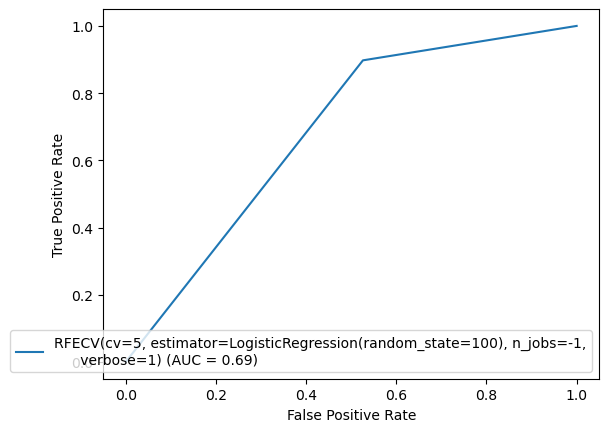

In [3888]:
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc_score(y_test_final.Target, y_test_final.predrfe),estimator_name=rfe)
display.plot()
plt.show()

It appears that logistic regression is not classifying satisfactorilyy due to ROC_AUC score being on 0.69

# Lets us Decison Tree model for classification

In [3889]:
from sklearn.tree import DecisionTreeClassifier

In [3890]:
dt_base = DecisionTreeClassifier(random_state=42, max_depth=4)

In [3891]:
dt_base.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [3892]:
y_train_final['preddt'] = dt_base.predict(X_train)
y_test_final['preddt'] = dt_base.predict(X_test)

In [3893]:
from sklearn.metrics import classification_report

In [3894]:
print(classification_report(y_test_final['Target'], y_test_final['preddt']))

              precision    recall  f1-score   support

           0       0.81      0.37      0.51      9564
           1       0.74      0.95      0.83     18008

    accuracy                           0.75     27572
   macro avg       0.78      0.66      0.67     27572
weighted avg       0.76      0.75      0.72     27572



In [3895]:
fpr,tpr,threshold=roc_curve(y_test_final['Target'], y_test_final['preddt'])

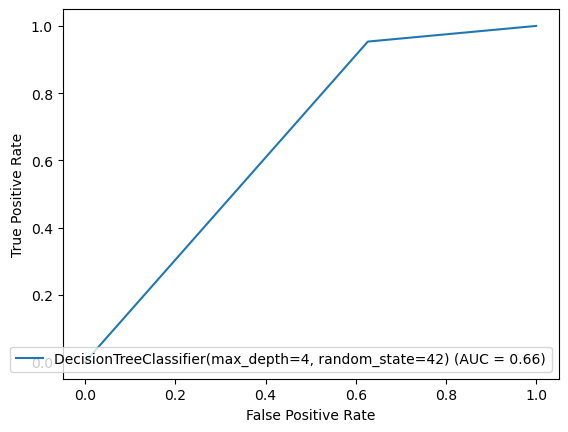

In [3896]:
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc_score(y_test_final['Target'], y_test_final['preddt']),estimator_name=dt_base)
display.plot()
plt.show()

In [3897]:
accuracy_score(y_test_final['Target'], y_test_final['preddt'])

0.7521761207021617

In [3898]:
accuracy=accuracy_score(y_test_final['Target'], y_test_final['preddt'])
roc_auc=roc_auc_score(y_test_final['Target'], y_test_final['preddt'])
Model='BaseDecisionTree'
temp=pd.DataFrame({'accuracy':accuracy,'Roc_auc':roc_auc,'Model':Model},index=[0])
model_score=pd.concat([model_score,temp])
model_score

,accuracy,Roc_auc,Model
0,0.750617,0.685755,logisticregression
0,0.752176,0.663342,BaseDecisionTree


### Creating Decsion Tree Classifier with Hyperparameter Tuning

In [3899]:
from sklearn.model_selection import GridSearchCV

In [3900]:
dt = DecisionTreeClassifier(random_state=42)

In [3901]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [3902]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [3903]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [3904]:
grid_search.best_score_

0.8522375738372735

In [3905]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

In [3906]:
y_train_final['predbestdt']=dt_best.predict(X_train)
y_test_final['predbestdt']=dt_best.predict(X_test)

In [3907]:
fpr,tpr,threshold=roc_curve(y_test_final['Target'], y_test_final['predbestdt'])

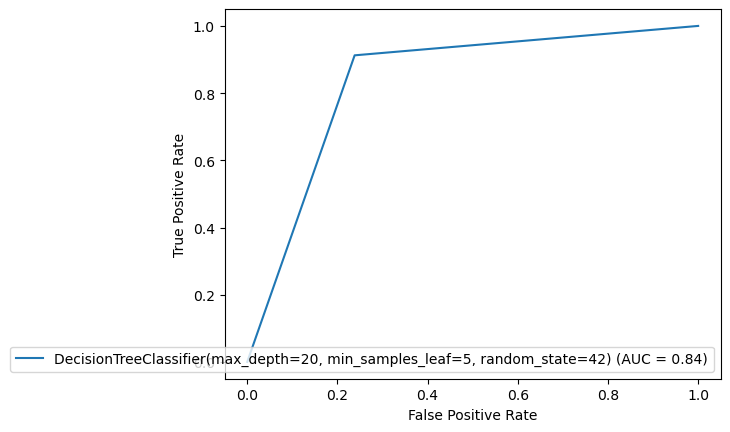

In [3908]:
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc_score(y_test_final['Target'], y_test_final['predbestdt']),estimator_name=dt_best)
display.plot()
plt.show()

In [3909]:
print(classification_report(y_test_final['Target'], y_test_final['predbestdt']))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      9564
           1       0.88      0.91      0.90     18008

    accuracy                           0.86     27572
   macro avg       0.85      0.84      0.84     27572
weighted avg       0.86      0.86      0.86     27572



In [3910]:
roc_auc_score(y_test_final['Target'], y_test_final['predbestdt'])

0.8371492404230956

In [3911]:
accuracy=accuracy_score(y_test_final['Target'], y_test_final['predbestdt'])
roc_auc=roc_auc_score(y_test_final['Target'], y_test_final['predbestdt'])
Model='BestDecisionTree'
temp=pd.DataFrame({'accuracy':accuracy,'Roc_auc':roc_auc,'Model':Model},index=[0])
model_score=pd.concat([model_score,temp])
model_score

,accuracy,Roc_auc,Model
0,0.750617,0.685755,logisticregression
0,0.752176,0.663342,BaseDecisionTree
0,0.860221,0.837149,BestDecisionTree


# Checking if we can get better performance from RandomForest

In [3912]:
from sklearn.ensemble import RandomForestClassifier

In [3913]:
rf=RandomForestClassifier(n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [3914]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features=5, n_estimators=10,
                       oob_score=True, random_state=100)

In [3915]:
rf.oob_score_

0.7403665303965306

In [3916]:
y_train_final['predrf']=rf.predict(X_train)
y_test_final['predrf']=rf.predict(X_test)

In [3917]:
fpr,tpr,threshold=roc_curve(y_test_final['Target'], y_test_final['predrf'])

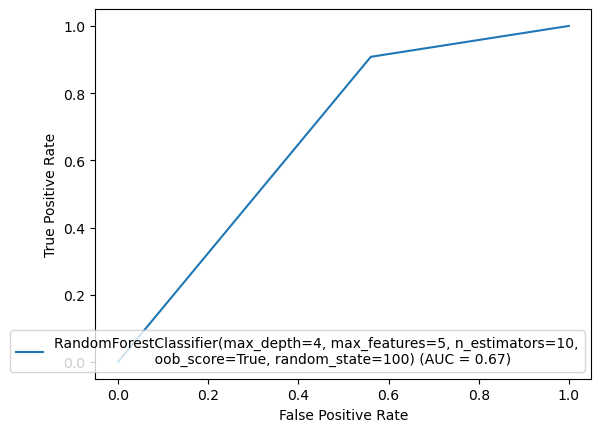

In [3918]:
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc_score(y_test_final['Target'], y_test_final['predrf']),estimator_name=rf)
display.plot()
plt.show()

In [3919]:
accuracy=accuracy_score(y_test_final['Target'], y_test_final['predrf'])
roc_auc=roc_auc_score(y_test_final['Target'], y_test_final['predrf'])
Model='BaseRandomForest'
temp=pd.DataFrame({'accuracy':accuracy,'Roc_auc':roc_auc,'Model':Model},index=[0])
model_score=pd.concat([model_score,temp])
model_score

,accuracy,Roc_auc,Model
0,0.750617,0.685755,logisticregression
0,0.752176,0.663342,BaseDecisionTree
0,0.860221,0.837149,BestDecisionTree
0,0.745466,0.673698,BaseRandomForest


# Hyperparameter tuning for Random Forest

In [3920]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [3921]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [3922]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [3923]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [3924]:
grid_search.best_score_

0.85163136685111

In [3925]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_jobs=-1,
                       random_state=42)

In [3926]:
y_train_final['predbestrf']=rf_best.predict(X_train)
y_test_final['predbestrf']=rf_best.predict(X_test)

In [3927]:
fpr,tpr,threshold=roc_curve(y_test_final['Target'], y_test_final['predbestrf'])

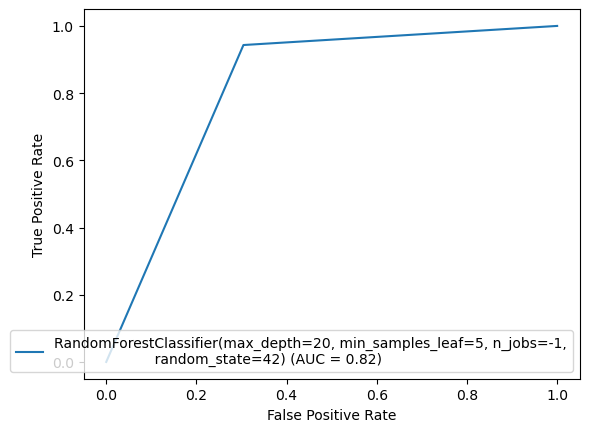

In [3928]:
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc_score(y_test_final['Target'], y_test_final['predbestrf']),estimator_name=rf_best)
display.plot()
plt.show()

In [3929]:
accuracy=accuracy_score(y_test_final['Target'], y_test_final['predbestrf'])
roc_auc=roc_auc_score(y_test_final['Target'], y_test_final['predbestrf'])
Model='BestRandomForest'
temp=pd.DataFrame({'accuracy':accuracy,'Roc_auc':roc_auc,'Model':Model},index=[0])
model_score=pd.concat([model_score,temp])
model_score

,accuracy,Roc_auc,Model
0,0.750617,0.685755,logisticregression
0,0.752176,0.663342,BaseDecisionTree
0,0.860221,0.837149,BestDecisionTree
0,0.745466,0.673698,BaseRandomForest
0,0.857319,0.819435,BestRandomForest


# Completed building the classificatin model and selected the best model.
## DecisionTreeClassifier using GridsearchCV gave the best ROC_AUC score accuracy

Now finding the feature importance

In [3930]:
dt_best.feature_importances_

array([5.22157964e-01, 5.59493242e-02, 3.19843721e-02, 4.36314446e-03,
       7.40121995e-02, 1.17486102e-02, 2.83583515e-04, 2.73352698e-03,
       2.45292455e-03, 3.14941562e-02, 5.29761430e-03, 1.86886822e-02,
       7.37389499e-02, 4.50867310e-03, 1.10487279e-01, 2.71751747e-03,
       2.15980240e-02, 2.57834542e-02])

In [3931]:
dt_best.feature_names_in_

array(['USD Amount log', 'Amount_ratio', 'INVOICE_CURRENCY_CODE_AED',
       'INVOICE_CURRENCY_CODE_Others', 'INVOICE_CURRENCY_CODE_SAR',
       'INVOICE_CURRENCY_CODE_USD', 'INVOICE_CLASS_CM',
       'INVOICE_CLASS_DM', 'INVOICE_CLASS_INV', 'PAYMENT_TERM_BIN_<0',
       'PAYMENT_TERM_BIN_0-15', 'PAYMENT_TERM_BIN_15-30',
       'PAYMENT_TERM_BIN_30-45', 'PAYMENT_TERM_BIN_45-60',
       'PAYMENT_TERM_BIN_60-90', 'PAYMENT_TERM_BIN_90<', 'cluster_id_0',
       'cluster_id_1'], dtype=object)

In [3932]:
feature_importance=pd.DataFrame({'Feature':dt_best.feature_names_in_,'Importance': dt_best.feature_importances_}).sort_values('Importance',ascending=False)

In [3933]:
feature_importance

,Feature,Importance
0,USD Amount log,0.522158
14,PAYMENT_TERM_BIN_60-90,0.110487
4,INVOICE_CURRENCY_CODE_SAR,0.074012
12,PAYMENT_TERM_BIN_30-45,0.073739
1,Amount_ratio,0.055949
2,INVOICE_CURRENCY_CODE_AED,0.031984
9,PAYMENT_TERM_BIN_<0,0.031494
17,cluster_id_1,0.025783
16,cluster_id_0,0.021598
11,PAYMENT_TERM_BIN_15-30,0.018689


# CREATING DECISIONTREE FOR INTERPRETATION

In [3623]:
model_data_dt.head()

,INVOICE_CLASS,INVOICE_CURRENCY_CODE,Target,PAYMENT_TERM_BIN,USD Amount log,Amount_ratio,cluster_id
0,INV,AED,1,45-60,11.523060,0.272294,1
1,INV,SAR,1,15-30,10.799376,0.266613,1
2,INV,SAR,0,15-30,10.645225,0.266613,1
3,INV,SAR,1,15-30,10.645225,0.266613,0
4,INV,SAR,1,15-30,10.645225,0.266613,1


In [3624]:
model_data_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91905 entries, 0 to 91904
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   INVOICE_CLASS          91905 non-null  object  
 1   INVOICE_CURRENCY_CODE  91905 non-null  object  
 2   Target                 91905 non-null  int64   
 3   PAYMENT_TERM_BIN       91905 non-null  category
 4   USD Amount log         91905 non-null  float64 
 5   Amount_ratio           91905 non-null  float64 
 6   cluster_id             91905 non-null  object  
dtypes: category(1), float64(2), int64(1), object(3)
memory usage: 5.0+ MB


In [3625]:
model_data_dt['PAYMENT_TERM_BIN']=model_data_dt.PAYMENT_TERM_BIN.cat.codes

In [3626]:
cols=model_data_dt.columns[model_data_dt.dtypes=='object']

In [3627]:
model_data_dt[cols]=model_data_dt[cols].astype('category')

In [3628]:
for column in cols:
    model_data_dt[column]=model_data_dt[column].cat.codes

In [3629]:
model_data_dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91905 entries, 0 to 91904
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   INVOICE_CLASS          91905 non-null  int8   
 1   INVOICE_CURRENCY_CODE  91905 non-null  int8   
 2   Target                 91905 non-null  int64  
 3   PAYMENT_TERM_BIN       91905 non-null  int8   
 4   USD Amount log         91905 non-null  float64
 5   Amount_ratio           91905 non-null  float64
 6   cluster_id             91905 non-null  int8   
dtypes: float64(2), int64(1), int8(4)
memory usage: 3.2 MB


In [3630]:
df_train_dt, df_test_dt = train_test_split(model_data_dt, train_size = 0.7, test_size = 0.3, stratify=model_data_dt.Target,random_state = 100)

In [3631]:
y_train_dt=df_train_dt['Target']
X_train_dt=df_train_dt.drop('Target',axis=1)

In [3632]:
len(y_train_dt)

64333

In [3633]:
y_test_dt=df_test_dt['Target']
X_test_dt=df_test_dt.drop('Target',axis=1)

In [3634]:
len(df_test_dt)

27572

In [3635]:
dt = DecisionTreeClassifier(random_state=42)

In [3636]:
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [3637]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [3638]:
grid_search.fit(X_train_dt, y_train_dt)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [3639]:
grid_search.best_score_

0.855361975460456

In [3640]:
dt_best1 = grid_search.best_estimator_
dt_best1

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=42)

In [3641]:
y_train_final['predbestdt1']=dt_best1.predict(X_train_dt)
y_test_final['predbestdt1']=dt_best1.predict(X_test_dt)

In [3642]:
fpr,tpr,threshold=roc_curve(y_test_final['Target'], y_test_final['predbestdt1'])

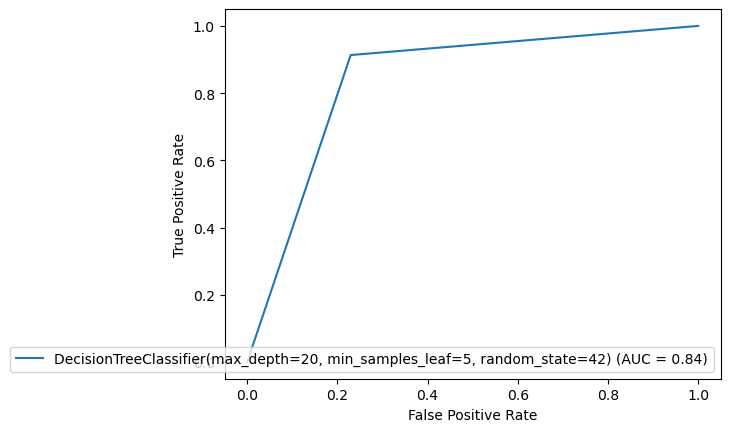

In [3643]:
display=RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc_score(y_test_final['Target'], y_test_final['predbestdt1']),estimator_name=dt_best1)
display.plot()
plt.show()

In [3644]:
print(classification_report(y_test_final['Target'], y_test_final['predbestdt1']))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80      9564
           1       0.88      0.91      0.90     18008

    accuracy                           0.86     27572
   macro avg       0.85      0.84      0.85     27572
weighted avg       0.86      0.86      0.86     27572



In [3645]:
roc_auc_score(y_train_final['Target'], y_train_final['predbestdt1'])

0.8670349723331069

In [3646]:
accuracy=accuracy_score(y_test_final['Target'], y_test_final['predbestdt1'])
roc_auc=roc_auc_score(y_test_final['Target'], y_test_final['predbestdt1'])
Model='BestDecisionTreefeatureenginerring'
temp=pd.DataFrame({'accuracy':accuracy,'Roc_auc':roc_auc,'Model':Model},index=[0])
model_score=pd.concat([model_score,temp])
model_score

,accuracy,Roc_auc,Model
0,0.751378,0.689501,logisticregression
0,0.752176,0.663342,BaseDecisionTree
0,0.863739,0.841240,BestDecisionTree
0,0.746192,0.674768,BaseRandomForest
0,0.862505,0.831201,BestRandomForest
0,0.863775,0.841929,BestDecisionTreefeatureenginerring


In [3647]:
feature_importance=pd.DataFrame({'Feature':dt_best1.feature_names_in_,'Importance': dt_best1.feature_importances_}).sort_values('Importance',ascending=False)

In [3648]:
feature_importance

,Feature,Importance
3,USD Amount log,0.514116
2,PAYMENT_TERM_BIN,0.244690
4,Amount_ratio,0.138382
1,INVOICE_CURRENCY_CODE,0.068850
5,cluster_id,0.031153
0,INVOICE_CLASS,0.002809


## The order of importance of the features are as above.
- It appears that USD Amount has highest importance in knowing whether a customer will default or not
- This is followed by PAYMENT_TERM

# Now lets 

# Now preparing the Open Invoice data for predicting the real world data for the company to act on

In [3942]:
df2=pd.read_csv('Open_Invoice_data.csv',encoding="ISO-8859-1")

In [3943]:
df2.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [3944]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AS_OF_DATE            88204 non-null  object 
 1   Customer Type         88204 non-null  object 
 2   Customer_Name         88204 non-null  object 
 3   Customer Account No   88201 non-null  float64
 4   Transaction Number    88195 non-null  object 
 5   Transaction Date      88204 non-null  object 
 6   Payment Term          88204 non-null  object 
 7   Due Date              88204 non-null  object 
 8   Transaction Currency  88204 non-null  object 
 9   Local Amount          88204 non-null  object 
 10  Transaction Class     88204 non-null  object 
 11  AGE                   88204 non-null  int64  
 12  USD Amount            88204 non-null  object 
 13  INV_CREATION_DATE     88204 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 9.4+ MB


Now cleaning the dataset to be used in our classification model

### Correcting the dtypes of USD Amount and Local Amount data

In [3945]:
df2['USD Amount'].head()

0    -3,088
1     2,000
2     2,000
3     2,415
4     3,800
Name: USD Amount, dtype: object

In [3946]:
def clean(string):
    out=''
    if string[0]=='-':
        out=out+'-'
    for i in string:
        if i.isnumeric():
            out=out+i
        else:
            continue
    return int(out)
    

In [3947]:
df2['USD Amount']=df2['USD Amount'].apply(clean)

In [3948]:
df2['Local Amount'].head()

0    -3,088
1     2,000
2     2,000
3     2,415
4     3,800
Name: Local Amount, dtype: object

In [3949]:
df2['Local Amount']=df2['Local Amount'].apply(clean)

In [3950]:
df2['Local Amount'].head()

0   -3088
1    2000
2    2000
3    2415
4    3800
Name: Local Amount, dtype: int64

In [3951]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AS_OF_DATE            88204 non-null  object 
 1   Customer Type         88204 non-null  object 
 2   Customer_Name         88204 non-null  object 
 3   Customer Account No   88201 non-null  float64
 4   Transaction Number    88195 non-null  object 
 5   Transaction Date      88204 non-null  object 
 6   Payment Term          88204 non-null  object 
 7   Due Date              88204 non-null  object 
 8   Transaction Currency  88204 non-null  object 
 9   Local Amount          88204 non-null  int64  
 10  Transaction Class     88204 non-null  object 
 11  AGE                   88204 non-null  int64  
 12  USD Amount            88204 non-null  int64  
 13  INV_CREATION_DATE     88204 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 9.4+ MB


###  Correcting the dtypes of Dates

In [3952]:
date_cols=['AS_OF_DATE','Due Date','INV_CREATION_DATE']

In [3953]:
df2[date_cols].head(10)

,AS_OF_DATE,Due Date,INV_CREATION_DATE
0,04-APR-2022 01:07:01,21/12/2021,12/21/2021 12:53
1,04-APR-2022 01:07:01,03/03/2022,2/1/2022 14:09
2,04-APR-2022 01:07:01,23/04/2022,3/24/2022 17:46
3,04-APR-2022 01:07:01,19/01/2022,1/5/2022 11:49
4,04-APR-2022 01:07:01,30/04/2022,3/3/2022 22:30
5,04-APR-2022 01:07:01,30/04/2022,3/3/2022 22:30
6,04-APR-2022 01:07:01,30/04/2022,3/15/2022 19:06
7,04-APR-2022 01:07:01,30/04/2022,3/15/2022 19:06
8,04-APR-2022 01:07:01,30/04/2022,3/15/2022 19:06
9,04-APR-2022 01:07:01,30/04/2022,3/15/2022 19:06


In [3954]:
df2['INV_CREATION_DATE']=pd.to_datetime(df2['INV_CREATION_DATE'])
df2['INV_CREATION_DATE'].head()

0   2021-12-21 12:53:00
1   2022-02-01 14:09:00
2   2022-03-24 17:46:00
3   2022-01-05 11:49:00
4   2022-03-03 22:30:00
Name: INV_CREATION_DATE, dtype: datetime64[ns]

In [3955]:
df2['Due Date']=pd.to_datetime(df2['Due Date'],format='%d/%m/%Y')
df2['Due Date']=df2['Due Date']
df2['Due Date'].head()

0   2021-12-21
1   2022-03-03
2   2022-04-23
3   2022-01-19
4   2022-04-30
Name: Due Date, dtype: datetime64[ns]

In [3956]:
df2['AS_OF_DATE']=pd.to_datetime(df2['AS_OF_DATE'])
df2['AS_OF_DATE']=df2['AS_OF_DATE']
df2['AS_OF_DATE'].head()

0   2022-04-04 01:07:01
1   2022-04-04 01:07:01
2   2022-04-04 01:07:01
3   2022-04-04 01:07:01
4   2022-04-04 01:07:01
Name: AS_OF_DATE, dtype: datetime64[ns]

In [3957]:
# Column called PAYMENT_TERM_DAYS need to be created from available data

In [3958]:
df2['PAYMENT_TERM_DAYS']=df2['Due Date']-df2['INV_CREATION_DATE']
df2['PAYMENT_TERM_DAYS']=df2['PAYMENT_TERM_DAYS'].dt.days

# # We have to predict only those Invoices which are within Due Date on AS_OF_DATE

A positive value in the AGE column clearly indicates that the payment is already overdue. So, there is nothing to predict. But, a negative value in the AGE column means that the due date is yet to be crossed. Hence, your model should be able to predict whether the payment will be delayed or not only for those customers whose AGE value is negative.

In [3959]:
len(df2[df2.AGE<0])/len(df2)*100

31.83529091651172

In [3960]:
pred_data=df2[df2.AGE<0]

In [3961]:
pred_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28080 entries, 2 to 88189
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   AS_OF_DATE            28080 non-null  datetime64[ns]
 1   Customer Type         28080 non-null  object        
 2   Customer_Name         28080 non-null  object        
 3   Customer Account No   28080 non-null  float64       
 4   Transaction Number    28080 non-null  object        
 5   Transaction Date      28080 non-null  object        
 6   Payment Term          28080 non-null  object        
 7   Due Date              28080 non-null  datetime64[ns]
 8   Transaction Currency  28080 non-null  object        
 9   Local Amount          28080 non-null  int64         
 10  Transaction Class     28080 non-null  object        
 11  AGE                   28080 non-null  int64         
 12  USD Amount            28080 non-null  int64         
 13  INV_CREATION_DAT

Since PAYMENT_TERM_DAYS is extracted all date columns can be dropped

In [3962]:
pred_data.drop(date_cols,axis=1,inplace=True)

In [3963]:
pred_data.drop('Transaction Date',axis=1,inplace=True)

In [3964]:
pred_data['Customer Type'].value_counts()

Related Party    18531
3rd Party         9549
Name: Customer Type, dtype: int64

Customer Account No is same as CUSTOMER_NUMBER in recept data, more over 3 null values can be dropped

In [3965]:
pred_data.isnull().sum()

Customer Type           0
Customer_Name           0
Customer Account No     0
Transaction Number      0
Payment Term            0
Transaction Currency    0
Local Amount            0
Transaction Class       0
AGE                     0
USD Amount              0
PAYMENT_TERM_DAYS       0
dtype: int64

transaction class is same as INVOICE_CLASS in receipt data

In [3966]:
df2['Transaction Class'].value_counts()

INVOICE        79523
CREDIT NOTE     5954
PAYMENT         1443
DEBIT NOTE      1284
Name: Transaction Class, dtype: int64

It needs to be converted into same format as available in receipt data and Changing the name of the column Transaction Class to INVOICE_CLASS

In [3967]:
pred_data['INVOICE_CLASS']=pred_data['Transaction Class'].map({'INVOICE':'INV','CREDIT NOTE':'CM','PAYMENT':'INV','DEBIT NOTE':'DM'})

In [3968]:
pred_data['INVOICE_CLASS'].value_counts()

INV    27795
DM       285
Name: INVOICE_CLASS, dtype: int64

In [3969]:

pred_data.drop('Transaction Class',axis=1,inplace=True)

In [3970]:
pred_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28080 entries, 2 to 88189
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer Type         28080 non-null  object 
 1   Customer_Name         28080 non-null  object 
 2   Customer Account No   28080 non-null  float64
 3   Transaction Number    28080 non-null  object 
 4   Payment Term          28080 non-null  object 
 5   Transaction Currency  28080 non-null  object 
 6   Local Amount          28080 non-null  int64  
 7   AGE                   28080 non-null  int64  
 8   USD Amount            28080 non-null  int64  
 9   PAYMENT_TERM_DAYS     28080 non-null  int64  
 10  INVOICE_CLASS         28080 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.6+ MB


Transaction currency is same as  INVOICE_CURRENCY_CODE in recept data

In [3971]:
pred_data['Transaction Currency'].value_counts()

SAR    10148
AED     8895
USD     4136
KWD     2890
BHD      697
QAR      503
EGP      403
EUR      384
GBP       12
JOD        5
OMR        4
HKD        1
SGD        1
ZAR        1
Name: Transaction Currency, dtype: int64

In [3972]:
pred_data['INVOICE_CURRENCY_CODE']=pred_data['Transaction Currency'].apply(lambda x: x if x in ['AED','SAR','USD'] else 'Others')
pred_data.drop('Transaction Currency',axis=1,inplace=True)

In [3973]:
pred_data['INVOICE_CURRENCY_CODE'].value_counts()

SAR       10148
AED        8895
Others     4901
USD        4136
Name: INVOICE_CURRENCY_CODE, dtype: int64

In [3974]:
pred_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28080 entries, 2 to 88189
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Type          28080 non-null  object 
 1   Customer_Name          28080 non-null  object 
 2   Customer Account No    28080 non-null  float64
 3   Transaction Number     28080 non-null  object 
 4   Payment Term           28080 non-null  object 
 5   Local Amount           28080 non-null  int64  
 6   AGE                    28080 non-null  int64  
 7   USD Amount             28080 non-null  int64  
 8   PAYMENT_TERM_DAYS      28080 non-null  int64  
 9   INVOICE_CLASS          28080 non-null  object 
 10  INVOICE_CURRENCY_CODE  28080 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.6+ MB


Payment Term column can be dropped since it is in string formate and we have derived the PAYMENT_TERM_DAYS

In [3975]:
pred_data.drop('Payment Term',axis=1,inplace=True)

In [3976]:
pred_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28080 entries, 2 to 88189
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Type          28080 non-null  object 
 1   Customer_Name          28080 non-null  object 
 2   Customer Account No    28080 non-null  float64
 3   Transaction Number     28080 non-null  object 
 4   Local Amount           28080 non-null  int64  
 5   AGE                    28080 non-null  int64  
 6   USD Amount             28080 non-null  int64  
 7   PAYMENT_TERM_DAYS      28080 non-null  int64  
 8   INVOICE_CLASS          28080 non-null  object 
 9   INVOICE_CURRENCY_CODE  28080 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.4+ MB


Local Amount can be dropped since we already have USD Amount and it is collinear with USD Amount

In [3977]:
pred_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28080 entries, 2 to 88189
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Type          28080 non-null  object 
 1   Customer_Name          28080 non-null  object 
 2   Customer Account No    28080 non-null  float64
 3   Transaction Number     28080 non-null  object 
 4   Local Amount           28080 non-null  int64  
 5   AGE                    28080 non-null  int64  
 6   USD Amount             28080 non-null  int64  
 7   PAYMENT_TERM_DAYS      28080 non-null  int64  
 8   INVOICE_CLASS          28080 non-null  object 
 9   INVOICE_CURRENCY_CODE  28080 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 2.4+ MB


In [3978]:
pred_data['CUSTOMER_NAME']=pred_data['Customer_Name']

In [3979]:
pred_data['CUSTOMER_NUMBER']=pred_data['Customer Account No']

In [3980]:
pred_data['CUSTOMER_NUMBER']=pred_data['CUSTOMER_NUMBER'].astype('object')

#### Adding thr cluster_id column to add the customer segment to the data

In [3981]:
Customer_group.head()

,CUSTOMER_NUMBER,mean,std,cluster_id
0,10100,76.000000,0.000000,0
1,10320,21.476190,15.542262,0
2,10360,39.893617,23.610272,0
3,1044,91.902383,69.173097,0
4,1076,39.864000,28.282088,0


In [3982]:
pred_data=pd.merge(pred_data,Customer_group_name,how='left',on='CUSTOMER_NAME')

In [3983]:
pred_data.isnull().sum()

Customer Type              0
Customer_Name              0
Customer Account No        0
Transaction Number         0
Local Amount               0
AGE                        0
USD Amount                 0
PAYMENT_TERM_DAYS          0
INVOICE_CLASS              0
INVOICE_CURRENCY_CODE      0
CUSTOMER_NAME              0
CUSTOMER_NUMBER            0
cluster_id               784
dtype: int64

In [3984]:
pred_data[pred_data['CUSTOMER_NUMBER']=='10100']

,Customer Type,Customer_Name,Customer Account No,Transaction Number,Local Amount,AGE,USD Amount,PAYMENT_TERM_DAYS,INVOICE_CLASS,INVOICE_CURRENCY_CODE,CUSTOMER_NAME,CUSTOMER_NUMBER,cluster_id


In [3985]:
len(pred_data[pred_data['PAYMENT_TERM_DAYS']<0])/len(pred_data)*100

0.0

<Axes: >

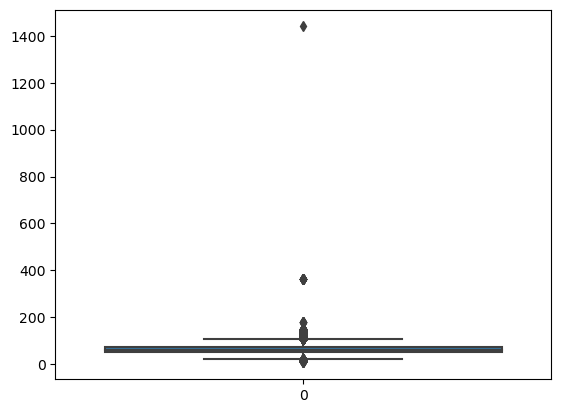

In [3986]:
sns.boxplot(pred_data['PAYMENT_TERM_DAYS'])

lets bin the payment_term_days

In [3987]:
bins = [-20,0,15,30,45,60,90,2000]

labels = [ "<0","0-15","15-30","30-45","45-60","60-90","90<"]


pred_data['PAYMENT_TERM_BIN'] = pd.cut(pred_data.PAYMENT_TERM_DAYS, bins=bins, labels=labels)

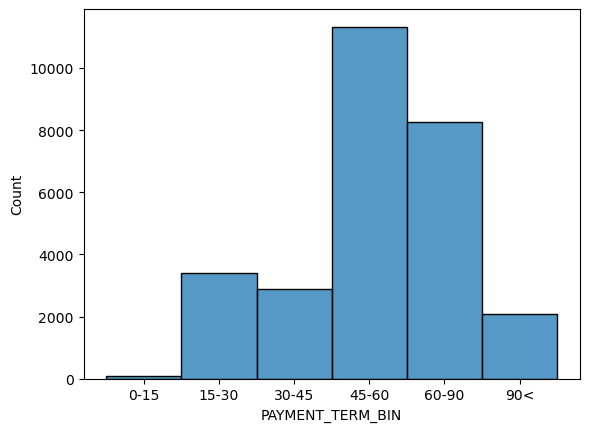

In [3988]:
sns.histplot(pred_data['PAYMENT_TERM_BIN'])
plt.show()

In [3989]:
pred_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28080 entries, 0 to 28079
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Customer Type          28080 non-null  object  
 1   Customer_Name          28080 non-null  object  
 2   Customer Account No    28080 non-null  float64 
 3   Transaction Number     28080 non-null  object  
 4   Local Amount           28080 non-null  int64   
 5   AGE                    28080 non-null  int64   
 6   USD Amount             28080 non-null  int64   
 7   PAYMENT_TERM_DAYS      28080 non-null  int64   
 8   INVOICE_CLASS          28080 non-null  object  
 9   INVOICE_CURRENCY_CODE  28080 non-null  object  
 10  CUSTOMER_NAME          28080 non-null  object  
 11  CUSTOMER_NUMBER        28080 non-null  object  
 12  cluster_id             27296 non-null  float64 
 13  PAYMENT_TERM_BIN       28080 non-null  category
dtypes: category(1), float64(2), int64(4), 

In [3990]:
pred_data.isnull().sum()

Customer Type              0
Customer_Name              0
Customer Account No        0
Transaction Number         0
Local Amount               0
AGE                        0
USD Amount                 0
PAYMENT_TERM_DAYS          0
INVOICE_CLASS              0
INVOICE_CURRENCY_CODE      0
CUSTOMER_NAME              0
CUSTOMER_NUMBER            0
cluster_id               784
PAYMENT_TERM_BIN           0
dtype: int64

In [3991]:
pred_data.describe()

,Customer Account No,Local Amount,AGE,USD Amount,PAYMENT_TERM_DAYS,cluster_id
count,28080.000000,2.808000e+04,28080.000000,2.808000e+04,28080.000000,27296.000000
mean,14014.595691,1.943328e+04,-34.457621,9.317022e+03,62.078312,0.916838
std,15143.228946,9.267899e+04,21.659564,5.655069e+04,24.626191,0.276133
min,1044.000000,-2.000000e+06,-359.000000,-5.332270e+05,7.000000,0.000000
25%,2315.000000,9.790000e+02,-55.000000,5.750000e+02,53.000000,1.000000
50%,7530.000000,3.687500e+03,-25.000000,1.795000e+03,59.000000,1.000000
75%,20855.000000,1.289025e+04,-20.000000,5.835250e+03,74.000000,1.000000
max,54987.000000,5.978000e+06,-1.000000,5.978000e+06,1440.000000,1.000000


drop rows with USD Amount less than 0

In [3992]:
pred_data=pred_data[(pred_data['USD Amount']>0)&(pred_data['Local Amount']>0)]

In [3993]:
pred_data['Amount_ratio']=pred_data['USD Amount']/pred_data['Local Amount']

In [3994]:
pred_data.drop('CUSTOMER_NUMBER',axis=1,inplace=True)

## Drop the columns which were not used during modelling the classifier

In [3995]:
feed_data=pred_data.drop(['Customer Type','Customer Account No','Customer Account No','Transaction Number','AGE','PAYMENT_TERM_DAYS','Customer_Name','CUSTOMER_NAME'],axis=1)

In [3996]:
feed_data.isnull().sum()

Local Amount               0
USD Amount                 0
INVOICE_CLASS              0
INVOICE_CURRENCY_CODE      0
cluster_id               768
PAYMENT_TERM_BIN           0
Amount_ratio               0
dtype: int64

In [3997]:
feed_data.describe()

,Local Amount,USD Amount,cluster_id,Amount_ratio
count,2.801500e+04,2.801500e+04,27247.000000,28015.000000
mean,1.964385e+04,9.394821e+03,0.916872,0.835216
std,9.165793e+04,5.646349e+04,0.276081,0.894322
min,1.000000e+00,1.000000e+00,0.000000,0.063552
25%,9.900000e+02,5.815000e+02,1.000000,0.266628
50%,3.705000e+03,1.801000e+03,1.000000,0.272364
75%,1.294000e+04,5.850000e+03,1.000000,1.000000
max,5.978000e+06,5.978000e+06,1.000000,4.000000


In [3998]:
feed_data['USD Amount log']=np.log(feed_data['USD Amount'])
feed_data['Local Amount log']=np.log(feed_data['Local Amount'])
feed_data.drop(['USD Amount','Local Amount'],axis=1,inplace=True)

In [3999]:
feed_data.isnull().sum()

INVOICE_CLASS              0
INVOICE_CURRENCY_CODE      0
cluster_id               768
PAYMENT_TERM_BIN           0
Amount_ratio               0
USD Amount log             0
Local Amount log           0
dtype: int64

In [4000]:
feed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28015 entries, 0 to 28079
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   INVOICE_CLASS          28015 non-null  object  
 1   INVOICE_CURRENCY_CODE  28015 non-null  object  
 2   cluster_id             27247 non-null  float64 
 3   PAYMENT_TERM_BIN       28015 non-null  category
 4   Amount_ratio           28015 non-null  float64 
 5   USD Amount log         28015 non-null  float64 
 6   Local Amount log       28015 non-null  float64 
dtypes: category(1), float64(4), object(2)
memory usage: 1.5+ MB


Creating Amount_Ratio

In [4001]:
# feed_data['Amount_ratio']=feed_data['USD Amount log']/feed_data['Local Amount log']

In [4002]:
feed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28015 entries, 0 to 28079
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   INVOICE_CLASS          28015 non-null  object  
 1   INVOICE_CURRENCY_CODE  28015 non-null  object  
 2   cluster_id             27247 non-null  float64 
 3   PAYMENT_TERM_BIN       28015 non-null  category
 4   Amount_ratio           28015 non-null  float64 
 5   USD Amount log         28015 non-null  float64 
 6   Local Amount log       28015 non-null  float64 
dtypes: category(1), float64(4), object(2)
memory usage: 1.5+ MB


In [4003]:
feed_data.describe()

,cluster_id,Amount_ratio,USD Amount log,Local Amount log
count,27247.000000,28015.000000,28015.000000,28015.000000
mean,0.916872,0.835216,7.483082,8.099552
std,0.276081,0.894322,1.808739,2.010127
min,0.000000,0.063552,0.000000,0.000000
25%,1.000000,0.266628,6.365611,6.897705
50%,1.000000,0.272364,7.496097,8.217439
75%,1.000000,1.000000,8.674197,9.468079
max,1.000000,4.000000,15.603597,15.603597


In [4004]:
feed_data.drop('Local Amount log',axis=1,inplace=True)

In [4005]:
feed_data.describe()

,cluster_id,Amount_ratio,USD Amount log
count,27247.000000,28015.000000,28015.000000
mean,0.916872,0.835216,7.483082
std,0.276081,0.894322,1.808739
min,0.000000,0.063552,0.000000
25%,1.000000,0.266628,6.365611
50%,1.000000,0.272364,7.496097
75%,1.000000,1.000000,8.674197
max,1.000000,4.000000,15.603597


<Axes: >

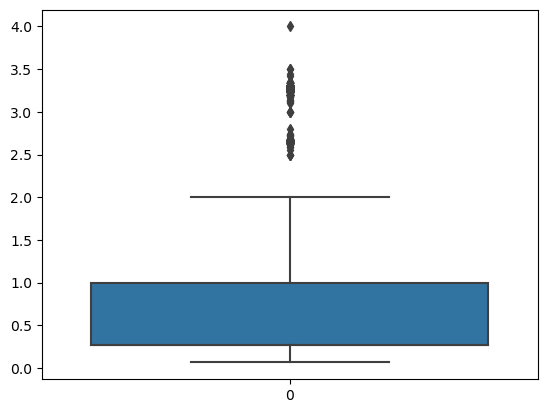

In [4006]:
sns.boxplot(feed_data.Amount_ratio)

# Using scalers used for training data scaler1 and scaler2

In [4007]:
feed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28015 entries, 0 to 28079
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   INVOICE_CLASS          28015 non-null  object  
 1   INVOICE_CURRENCY_CODE  28015 non-null  object  
 2   cluster_id             27247 non-null  float64 
 3   PAYMENT_TERM_BIN       28015 non-null  category
 4   Amount_ratio           28015 non-null  float64 
 5   USD Amount log         28015 non-null  float64 
dtypes: category(1), float64(3), object(2)
memory usage: 2.3+ MB


carrying out all the preprocessing steps on data

In [4008]:
feed_data['USD Amount log']=scaler1.transform(feed_data[['USD Amount log']])
feed_data['Amount_ratio']=scaler2.transform(feed_data[['Amount_ratio']])

In [4009]:
feed_data['cluster_id'].fillna(2,inplace=True)
feed_data['cluster_id']=feed_data['cluster_id'].astype('int')
feed_data['cluster_id']=feed_data['cluster_id'].astype('object')

In [4010]:
Dummies=pd.get_dummies(feed_data[['INVOICE_CLASS','INVOICE_CURRENCY_CODE','PAYMENT_TERM_BIN','cluster_id']])

In [4011]:
Dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28015 entries, 0 to 28079
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   INVOICE_CLASS_DM              28015 non-null  uint8
 1   INVOICE_CLASS_INV             28015 non-null  uint8
 2   INVOICE_CURRENCY_CODE_AED     28015 non-null  uint8
 3   INVOICE_CURRENCY_CODE_Others  28015 non-null  uint8
 4   INVOICE_CURRENCY_CODE_SAR     28015 non-null  uint8
 5   INVOICE_CURRENCY_CODE_USD     28015 non-null  uint8
 6   PAYMENT_TERM_BIN_<0           28015 non-null  uint8
 7   PAYMENT_TERM_BIN_0-15         28015 non-null  uint8
 8   PAYMENT_TERM_BIN_15-30        28015 non-null  uint8
 9   PAYMENT_TERM_BIN_30-45        28015 non-null  uint8
 10  PAYMENT_TERM_BIN_45-60        28015 non-null  uint8
 11  PAYMENT_TERM_BIN_60-90        28015 non-null  uint8
 12  PAYMENT_TERM_BIN_90<          28015 non-null  uint8
 13  cluster_id_0                  2

Only those features which were used for in training of ML model are to be available in feed data

In [4012]:
Dummies.drop('cluster_id_2',axis=1,inplace=True)

In [4013]:
feed_data=pd.concat([feed_data,Dummies],axis=1)

In [4014]:
feed_data.drop(['INVOICE_CLASS','PAYMENT_TERM_BIN','cluster_id','INVOICE_CURRENCY_CODE'],axis=1,inplace=True)

In [4015]:
feed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28015 entries, 0 to 28079
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Amount_ratio                  28015 non-null  float64
 1   USD Amount log                28015 non-null  float64
 2   INVOICE_CLASS_DM              28015 non-null  uint8  
 3   INVOICE_CLASS_INV             28015 non-null  uint8  
 4   INVOICE_CURRENCY_CODE_AED     28015 non-null  uint8  
 5   INVOICE_CURRENCY_CODE_Others  28015 non-null  uint8  
 6   INVOICE_CURRENCY_CODE_SAR     28015 non-null  uint8  
 7   INVOICE_CURRENCY_CODE_USD     28015 non-null  uint8  
 8   PAYMENT_TERM_BIN_<0           28015 non-null  uint8  
 9   PAYMENT_TERM_BIN_0-15         28015 non-null  uint8  
 10  PAYMENT_TERM_BIN_15-30        28015 non-null  uint8  
 11  PAYMENT_TERM_BIN_30-45        28015 non-null  uint8  
 12  PAYMENT_TERM_BIN_45-60        28015 non-null  uint8  
 13  P

In [4016]:
X_train.columns

Index(['USD Amount log', 'Amount_ratio', 'INVOICE_CURRENCY_CODE_AED',
       'INVOICE_CURRENCY_CODE_Others', 'INVOICE_CURRENCY_CODE_SAR',
       'INVOICE_CURRENCY_CODE_USD', 'INVOICE_CLASS_CM', 'INVOICE_CLASS_DM',
       'INVOICE_CLASS_INV', 'PAYMENT_TERM_BIN_<0', 'PAYMENT_TERM_BIN_0-15',
       'PAYMENT_TERM_BIN_15-30', 'PAYMENT_TERM_BIN_30-45',
       'PAYMENT_TERM_BIN_45-60', 'PAYMENT_TERM_BIN_60-90',
       'PAYMENT_TERM_BIN_90<', 'cluster_id_0', 'cluster_id_1'],
      dtype='object')

In [4017]:
feed_data.columns

Index(['Amount_ratio', 'USD Amount log', 'INVOICE_CLASS_DM',
       'INVOICE_CLASS_INV', 'INVOICE_CURRENCY_CODE_AED',
       'INVOICE_CURRENCY_CODE_Others', 'INVOICE_CURRENCY_CODE_SAR',
       'INVOICE_CURRENCY_CODE_USD', 'PAYMENT_TERM_BIN_<0',
       'PAYMENT_TERM_BIN_0-15', 'PAYMENT_TERM_BIN_15-30',
       'PAYMENT_TERM_BIN_30-45', 'PAYMENT_TERM_BIN_45-60',
       'PAYMENT_TERM_BIN_60-90', 'PAYMENT_TERM_BIN_90<', 'cluster_id_0',
       'cluster_id_1'],
      dtype='object')

Adding feature 'INVOICE_CLASS_CM' to pred data since that is not available

In [4018]:
feed_data['INVOICE_CLASS_CM']=0

The features should be entered in the same order as the data used for training the model

In [4056]:
pred_data['pred']=dt_best.predict(feed_data[X_train.columns])

In [4020]:
pred_data.head()

,Customer Type,Customer_Name,Customer Account No,Transaction Number,Local Amount,AGE,USD Amount,PAYMENT_TERM_DAYS,INVOICE_CLASS,INVOICE_CURRENCY_CODE,CUSTOMER_NAME,cluster_id,PAYMENT_TERM_BIN,Amount_ratio,pred
0,Related Party,AL J Corp,23152.0,100220000143,2000,-18,2000,29,INV,USD,AL J Corp,1.0,15-30,1.0,1
1,Related Party,ALLI Corp,7530.0,100220000105,3800,-25,3800,57,INV,AED,ALLI Corp,1.0,45-60,1.0,0
2,Related Party,ALLI Corp,7530.0,100220000106,1264,-25,1264,57,INV,AED,ALLI Corp,1.0,45-60,1.0,1
3,Related Party,ALLI Corp,7530.0,100220000124,25858,-25,25858,45,INV,AED,ALLI Corp,1.0,30-45,1.0,0
4,Related Party,ALLI Corp,7530.0,100220000125,39873,-25,39873,45,INV,AED,ALLI Corp,1.0,30-45,1.0,0


# Pred data would have the classification predictions of delayed payments at Invoice level

## This data can be used to aggregated at customer level to find probability of a customer to delay payment

In [4021]:
Customer_agg=pred_data.groupby('CUSTOMER_NAME').pred.mean()

In [4022]:
Customer_agg.head()

CUSTOMER_NAME
2H F Corp    0.666667
3D D Corp    0.300000
6TH  Corp    1.000000
ABDU Corp    0.701299
ABEE Corp    0.000000
Name: pred, dtype: float64

In [4044]:
Customer_agg.isnull().sum()

0

# Aggregation of the predicitons to find probability of customer to delay payments is obtained

In [4045]:
Delay_prob_customerwise=Customer_agg.reset_index()

In [4046]:
Delay_prob_customerwise.head()

,CUSTOMER_NAME,pred
0,2H F Corp,0.666667
1,3D D Corp,0.300000
2,6TH Corp,1.000000
3,ABDU Corp,0.701299
4,ABEE Corp,0.000000


In [4047]:
Delay_prob_customerwise.to_csv('List OF Customer delay probability.csv')

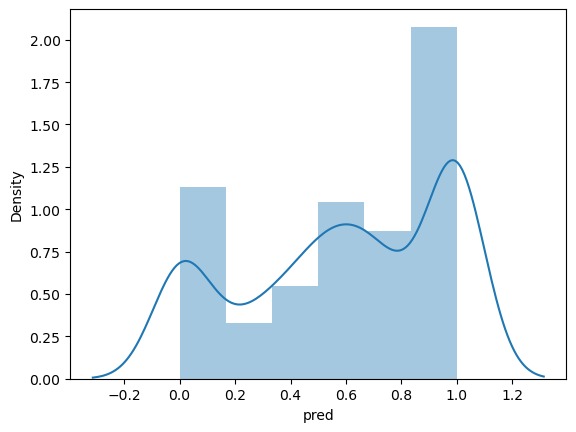

In [4048]:
sns.distplot(Delay_prob_customerwise['pred'])
plt.show()

Based on the business decision the threshold for the delay probability can be set so that those customers falling above that value will be pursued for payment of dues on time

In [4049]:
Delay_prob_customerwise=pd.merge(Delay_prob_customerwise,Customer_group_name,how='left',on='CUSTOMER_NAME')

In [4050]:
Delay_prob_customerwise.head()

,CUSTOMER_NAME,pred,cluster_id
0,2H F Corp,0.666667,NaN
1,3D D Corp,0.300000,1.0
2,6TH Corp,1.000000,1.0
3,ABDU Corp,0.701299,1.0
4,ABEE Corp,0.000000,1.0


In [4051]:
Delay_prob_customerwise['cluster_id']=Delay_prob_customerwise.cluster_id.fillna(2)

In [4052]:
Delay_prob_customerwise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 494 entries, 0 to 493
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CUSTOMER_NAME  494 non-null    object 
 1   pred           494 non-null    float64
 2   cluster_id     494 non-null    float64
dtypes: float64(2), object(1)
memory usage: 15.4+ KB


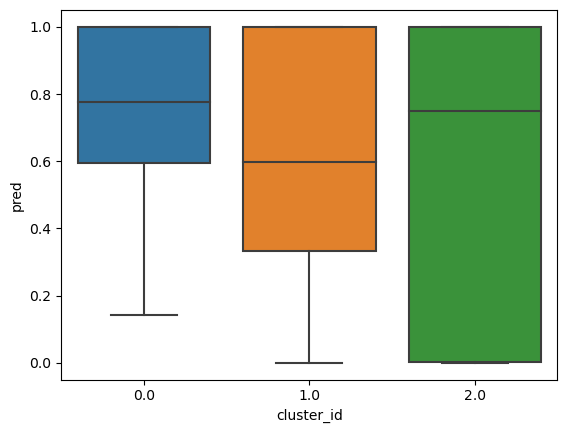

In [4054]:
sns.boxplot(y='pred',x='cluster_id',data=Delay_prob_customerwise)
plt.show()

# Observations and insights
Cluster_id 2 in above plot are Customers who were not placed in any segment
- Cluster_id 0, who had higher mean PAYMENT_DAYS with high standard deviation, has higher median probability for delayed payment
- Cluster_id 1,customers who had lower mean PAYMENT_DAYS with lower standard deviation has comparitively lower median of probability for delayed payments

Based on the above distribution, 0.6 can be suggested as the threshold for the Payments follow up team to decide on which vendors to target for regular followup